### Project Description
You are a marketing analyst of the Procrastinate Pro+ entertainment application. Despite huge investments in advertising, the company has been suffering losses for the past few months. Your task is to understand the reasons and help the company to become a plus.

There is data on users attracted from May 1 to October 27, 2019:
* server log with data on their visits,
* unloading of their purchases for this period,
* advertising expenses.

You have to study:
* where users come from and what devices they use,
* how much does it cost to attract users from various advertising channels;
* how much money does each client bring in,
* when the cost of attracting a client pays off,
* what factors prevent attracting customers.

### Data Description
You have three datasets at your disposal. The visits_info_short.csv file stores the server log with information about site visits, orders_info_short.csv — information about orders, and costs_info_short.csv — information about advertising expenses.

visits_info_short.csv structure:
* User Id — unique user ID,
* Region — user's country,
* Device — user's device type,
* Channel — ID of the transition source,
* Session Start — date and time of the session start,
* Session End — date and time of the end of the session.

orders_info_short.csv structure:
* User Id — unique user ID,
* Event Dt — date and time of purchase,
* Revenue — the amount of the order.

costs_info_short.csv structure:
* dt — date of the advertising campaign,
* Channel — the identifier of the advertising source,
* costs — expenses for this campaign.

## 1. Preparing data for analysis

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt


In [43]:
try:
    visits = pd.read_csv('/datasets/visits_info_short.csv')
    orders = pd.read_csv('/datasets/orders_info_short.csv')
    costs = pd.read_csv('/datasets/costs_info_short.csv')
except:
    visits = pd.read_csv('https://code.s3.yandex.net//datasets/visits_info_short.csv')
    orders = pd.read_csv('https://code.s3.yandex.net//datasets/orders_info_short.csv')
    costs = pd.read_csv('https://code.s3.yandex.net//datasets/costs_info_short.csv')

In [44]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [45]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [46]:
visits.duplicated().sum() # no obvious duplicates

0

Visits table: 309901 rows , 6 columns. 
* there are no missing values
* there are no obvious duplicates
* the names of the fields consist of two words with a capital letter (I will replace them with snake_case)
* the Session Start and Session End fields are of the object type (I will replace the type with datetime, which they essentially are)

In [47]:
visits.columns = visits.columns.str.replace(' ', '_').str.lower() # столбцы в snake_case
visits[['session_start', 'session_end']] = visits[['session_start', 'session_end']].apply(pd.to_datetime) # тип столбцов к datetime
visits.sample()

,user_id,region,device,channel,session_start,session_end
161377,351740565817,United States,Android,TipTop,2019-09-27 00:57:46,2019-09-27 01:45:04


In [48]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [49]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [50]:
orders.duplicated().sum() #no obvious duplicates

0

Orders table: 40212 rows, three columns
* there are no obvious duplicates
* there are no missing values
*  Event DT types: object field (I will replace it with datetime)
* field names of two words with capital letters, in shake_case

In [51]:
orders.columns = orders.columns.str.replace(' ', '_').str.lower() # столбцы в snake_case
orders['event_dt'] = pd.to_datetime(orders['event_dt']) # тип столбца к datetime
orders.sample()

,user_id,event_dt,revenue
4417,286013818676,2019-06-22 07:32:35,9.99


In [52]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [53]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [54]:
costs.duplicated().sum() # no obvious duplicates

0

Costs table: 1800 rows, 3 columns
* there are no missing values
* there are no obvious duplicates 
* field names (I will bring them to lowercase)
* The dt field is of type object (I will lead to datetime, data)

In [55]:
costs.columns = costs.columns.str.lower() 
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
costs.sample()

,dt,channel,costs
606,2019-07-06,TipTop,317.2


#### Output:
* Three tables visits, orders, costs 
* There are no obvious duplicates 
* Replaced column names with snake_case
* Brought the columns dt, event_dt, session_start, session_end to the datetime type

## 2. Functions for calculating and analyzing LTV, ROI, retention and conversion.

In [56]:
# I edit for the needs of the project
# function for creating user profiles

def get_profiles(visits, orders, costs):
    
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # for cohort analysis, we determine the date of the first visit
    # and the first day of the month in which this visit occurred
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # adding a sign of paying users
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

  # counting the number of unique users
    # with the same source and date of attraction
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

     #we combine spending on advertising and the number of attracted users
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # we divide advertising expenses by the number of attracted users
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

   #adding the cost of attraction to profiles
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # the cost of attracting organic users is zero
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles


In [57]:
# function for calculating retention

def get_retention(
     profiles,
     sessions,
     observation_date,
     horizon_days,
     dimensions=[],
     ignore_horizon=False,
):

     # add the payer column to the passed dimensions list
     dimensions = ['payer'] + dimensions

     # exclude users who have not “lived” to the analysis horizon
     last_suitable_acquisition_date = observation_date
     if not ignore_horizon:
         last_suitable_acquisition_date = observation_date - timedelta(
             days=horizon_days - 1
         )
     result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

     # collecting “raw” data to calculate retention
     result_raw = result_raw.merge(
         sessions[['user_id', 'session_start']], on='user_id', how='left'
     )
     result_raw['lifetime'] = (
         result_raw['session_start'] - result_raw['first_ts']
     ).dt.days

     # function for grouping the table according to the desired characteristics
     def group_by_dimensions(df, dims, horizon_days):
         result = df.pivot_table(
             index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
         )
         cohort_sizes = (
             df.groupby(dims)
             .agg({'user_id': 'nunique'})
             .rename(columns={'user_id': 'cohort_size'})
         )
         result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
         result = result.div(result['cohort_size'], axis=0)
         result = result[['cohort_size'] + list(range(horizon_days))]
         result['cohort_size'] = cohort_sizes
         return result

     # get the retention table
     result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

     # get a table of retention dynamics
     result_in_time = group_by_dimensions(
         result_raw, dimensions + ['dt'], horizon_days
     )

     # return both tables and raw data
     return result_raw, result_grouped, result_in_time

In [58]:
# function for calculating conversion

def get_conversion(
     profiles,
     purchases,
     observation_date,
     horizon_days,
     dimensions=[],
     ignore_horizon=False,
):

     # exclude users who have not “lived” to the analysis horizon
     last_suitable_acquisition_date = observation_date
     if not ignore_horizon:
         last_suitable_acquisition_date = observation_date - timedelta(
             days=horizon_days - 1
         )
     result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

     # determine the date and time of the first purchase for each user
     first_purchases = (
         purchases.sort_values(by=['user_id', 'event_dt'])
         .groupby('user_id')
         .agg({'event_dt': 'first'})
         .reset_index()
     )

     # add purchase data to profiles
     result_raw = result_raw.merge(
         first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
     )

     # We calculate life time for each purchase
     result_raw['lifetime'] = (
         result_raw['event_dt'] - result_raw['first_ts']
     ).dt.days

     # group by cohort if there is nothing in dimensions
     if len(dimensions) == 0:
         result_raw['cohort'] = 'All users'
         dimensions = dimensions + ['cohort']

     # function for grouping the table according to the desired characteristics
     def group_by_dimensions(df, dims, horizon_days):
         result = df.pivot_table(
             index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
         )
         result = result.fillna(0).cumsum(axis = 1)
         cohort_sizes = (
             df.groupby(dims)
             .agg({'user_id': 'nunique'})
             .rename(columns={'user_id': 'cohort_size'})
         )
         result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
         # divide each “cell” in the row by the cohort size
         # and get the conversion rate
         result = result.div(result['cohort_size'], axis=0)
         result = result[['cohort_size'] + list(range(horizon_days))]
         result['cohort_size'] = cohort_sizes
         return result

     # get the conversion table
     result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

     # for the conversion dynamics table, remove 'cohort' from dimensions
     if 'cohort' in dimensions:
         dimensions = []

     # get a table of conversion dynamics
     result_in_time = group_by_dimensions(
         result_raw, dimensions + ['dt'], horizon_days
     )

     # return both tables and raw data
     return result_raw, result_grouped, result_in_time

In [59]:
# function for calculating LTV and ROI

def get_ltv(
     profiles,
     purchases,
     observation_date,
     horizon_days,
     dimensions=[],
     ignore_horizon=False,
):

     # exclude users who have not “lived” to the analysis horizon
     last_suitable_acquisition_date = observation_date
     if not ignore_horizon:
         last_suitable_acquisition_date = observation_date - timedelta(
             days=horizon_days - 1
         )
     result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
     # add purchase data to profiles
     result_raw = result_raw.merge(
         purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
     )
     # We calculate the user’s life time for each purchase
     result_raw['lifetime'] = (
         result_raw['event_dt'] - result_raw['first_ts']
     ).dt.days
     # group by cohort if there is nothing in dimensions
     if len(dimensions) == 0:
         result_raw['cohort'] = 'All users'
         dimensions = dimensions + ['cohort']

     # grouping function according to desired characteristics
     def group_by_dimensions(df, dims, horizon_days):
         # building a “triangular” revenue table
         result = df.pivot_table(
             index=dims, columns='lifetime', values='revenue', aggfunc='sum'
         )
         # find the amount of revenue with accumulation
         result = result.fillna(0).cumsum(axis=1)
         # calculate cohort sizes
         cohort_sizes = (
             df.groupby(dims)
             .agg({'user_id': 'nunique'})
             .rename(columns={'user_id': 'cohort_size'})
         )
         # combine cohort sizes and revenue table
         result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
         # calculate LTV: divide each “cell” in a row by the size of the cohort
         result = result.div(result['cohort_size'], axis=0)
         # exclude all lifetimes exceeding the analysis horizon
         result = result[['cohort_size'] + list(range(horizon_days))]
         # restore cohort sizes
         result['cohort_size'] = cohort_sizes

         # collect a dataframe with user data and CAC values,
         # adding parameters from dimensions
         cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

         # calculate the average CAC based on parameters from dimensions
         cac = (
             cac.groupby(dims)
             .agg({'acquisition_cost': 'mean'})
             .rename(columns={'acquisition_cost': 'cac'})
         )

         # calculate ROI: divide LTV by CAC
         roi = result.div(cac['cac'], axis=0)

         # remove lines with infinite ROI
         roi = roi[~roi['cohort_size'].isin([np.inf])]

         # restore cohort sizes in the ROI table
         roi['cohort_size'] = cohort_sizes

         # add CAC to the ROI table
         roi['cac'] = cac['cac']

         # in the final table we leave the cohort sizes, CAC
         # and ROI in life times not exceeding the analysis horizon
         roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

         # return LTV and ROI tables
         return result, roi

     # get LTV and ROI tables
     result_grouped, roi_grouped = group_by_dimensions(
         result_raw, dimensions, horizon_days
     )

     # for dynamics tables remove 'cohort' from dimensions
     if 'cohort' in dimensions:
         dimensions = []

     # get LTV and ROI dynamics tables
     result_in_time, roi_in_time = group_by_dimensions(
         result_raw, dimensions + ['dt'], horizon_days
     )

     return (
         result_raw, # raw data
         result_grouped, # LTV table
         result_in_time, # LTV dynamics table
         roi_grouped, # ROI table
         roi_in_time, # ROI dynamics table
     )

In [60]:
# function for frame smoothing

def filter_data(df, window):
     # apply a moving average for each column
     for column in df.columns.values:
         df[column] = df[column].rolling(window).mean()
     return df

In [61]:
# function to visualize retention

def plot_retention(retention, retention_history, horizon, window=7):

     # set the grid size for graphs
     plt.figure(figsize=(15, 10))

     # exclude cohort sizes and first day retention
     retention = retention.drop(columns=['cohort_size', 0])
     # in the dynamics table we leave only the required lifetime
     retention_history = retention_history.drop(columns=['cohort_size'])[
         [horizon - 1]
     ]

     # if only payer is in the retention table indexes,
     # add a second sign - cohort
     if retention.index.nlevels == 1:
         retention['cohort'] = 'All users'
         retention = retention.reset_index().set_index(['cohort', 'payer'])

     # in the graph table - two columns and two rows, four cells
     # in the first we build retention curves for paying users
     ax1 = plt.subplot(2, 2, 1)
     retention.query('payer == True').droplevel('payer').T.plot(
         grid=True, ax=ax1
     )
     plt.legend()
     plt.xlabel('Lifetime')
     plt.title('Retention of paying users')

     # in the second cell we build retention curves for non-payers
     # vertical axis is from the graph from the first cell
     ax2 = plt.subplot(2, 2, 2, sharey=ax1)
     retention.query('payer == False').droplevel('payer').T.plot(
         grid=True, ax=ax2
     )
     plt.legend()
     plt.xlabel('Lifetime')
     plt.title('Retaining non-paying users')

     # in the third cell - dynamics of retention of paying people
     ax3 = plt.subplot(2, 2, 3)
     # get the column names for the pivot table
     columns = [
         name
         for name in retention_history.index.names
         if name not in ['dt', 'payer']
     ]
     # filter the data and build a graph
     filtered_data = retention_history.query('payer == True').pivot_table(
         index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax3)
     plt.xlabel('Date of attraction')
     plt.title(
         'Dynamics of retention of paying users on the {}th day'.format(
             horizon
         )
     )

     # in the fourth cell - the dynamics of retention of non-payers
     ax4 = plt.subplot(2, 2, 4, sharey=ax3)
     # filter the data and build a graph
     filtered_data = retention_history.query('payer == False').pivot_table(
         index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax4)
     plt.xlabel('Date of attraction')
     plt.title(
         'Dynamics of retention of non-paying users on the {}th day'.format(
             horizon
         )
     )
    
     plt.tight_layout()
     plt.show()

In [62]:
# function for visualizing conversion

def plot_conversion(conversion, conversion_history, horizon, window=7):

     # set the grid size for graphs
     plt.figure(figsize=(15, 5))

     # exclude cohort sizes
     conversion = conversion.drop(columns=['cohort_size'])
     # in the dynamics table we leave only the required lifetime
     conversion_history = conversion_history.drop(columns=['cohort_size'])[
         [horizon - 1]
     ]

     # first graph - conversion curves
     ax1 = plt.subplot(1, 2, 1)
     conversion.T.plot(grid=True, ax=ax1)
     plt.legend()
     plt.xlabel('Lifetime')
     plt.title('User Conversion')

     # second graph - conversion dynamics
     ax2 = plt.subplot(1, 2, 2, sharey=ax1)
     columns = [
         # all index columns except date will become pivot table columns
         name for name in conversion_history.index.names if name not in ['dt']
     ]
     filtered_data = conversion_history.pivot_table(
         index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax2)
     plt.xlabel('Date of attraction')
     plt.title('Dynamics of user conversion on the {}th day'.format(horizon))

     plt.tight_layout()
     plt.show()

In [63]:
# function for visualizing LTV and ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

     # set the graph rendering grid
     plt.figure(figsize=(20, 10))

     # exclude cohort sizes from the ltv table
     ltv = ltv.drop(columns=['cohort_size'])
     # in the ltv dynamics table we leave only the required lifetime
     ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

     # the cost of attraction will be recorded in a separate frame
     cac_history = roi_history[['cac']]

     # exclude cohort sizes and cac from the roi table
     roi = roi.drop(columns=['cohort_size', 'cac'])
     # in the roi dynamics table we leave only the required lifetime
     roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
         [horizon - 1]
     ]

     # first graph - ltv curves
     ax1 = plt.subplot(2, 3, 1)
     ltv.T.plot(grid=True, ax=ax1)
     plt.legend()
     plt.xlabel('Lifetime')
     plt.title('LTV')

     # second graph - ltv dynamics
     ax2 = plt.subplot(2, 3, 2, sharey=ax1)
     # all index columns except date will become pivot table columns
     columns = [name for name in ltv_history.index.names if name not in ['dt']]
     filtered_data = ltv_history.pivot_table(
         index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax2)
     plt.xlabel('Date of attraction')
     plt.title('Dynamics of LTV of users on the {}th day'.format(horizon))

     # third graph - cac dynamics
     ax3 = plt.subplot(2, 3, 3, sharey=ax1)
     # all index columns except date will become pivot table columns
     columns = [name for name in cac_history.index.names if name not in ['dt']]
     filtered_data = cac_history.pivot_table(
         index='dt', columns=columns, values='cac', aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax3)
     plt.xlabel('Date of attraction')
     plt.title('Dynamics of user acquisition cost')

     # fourth graph - roi curves
     ax4 = plt.subplot(2, 3, 4)
     roi.T.plot(grid=True, ax=ax4)
     plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
     plt.legend()
     plt.xlabel('Lifetime')
     plt.title('ROI')

     # fifth chart - roi dynamics
     ax5 = plt.subplot(2, 3, 5, sharey=ax4)
     # all index columns except date will become pivot table columns
     columns = [name for name in roi_history.index.names if name not in ['dt']]
     filtered_data = roi_history.pivot_table(
         index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
     )
     filter_data(filtered_data, window).plot(grid=True, ax=ax5)
     plt.axhline(y=1, color='red', linestyle='--', label='Payback level')
     plt.xlabel('Date of attraction')
     plt.title('Dynamics of user ROI on the {}th day'.format(horizon))

     plt.tight_layout()
     plt.show()

## 3. Research data analysis
* Create user profiles. Determine the minimum and maximum dates for attracting users.
* Find out which countries users come to the app from and which country accounts for the most paying users. Build a table showing the number of users and the share of payers from each country.
* Find out which devices are used by customers and which devices are preferred by paying users. Build a table showing the number of users and the percentage of payers for each device.
* Study the advertising sources of attraction and determine the channels from which the most paying users came. Build a table showing the number of users and the share of payers for each attraction channel.
* After each point, formulate conclusions.

In [64]:

profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [65]:
min_analysis_date = profiles['first_ts'].min()
max_analysis_date = profiles['first_ts'].max()
print(f'Minimum user acquisition date: {min_analysis_date}')
print(f'Maximum user acquisition date: {max_analysis_date}')

Minimum user acquisition date: 2019-05-01 00:00:41
Maximum user acquisition date: 2019-10-27 23:59:04


In [66]:
paying_country_users = profiles.groupby('region').agg({'user_id': 'nunique', 'payer':['sum', 'mean']})
paying_country_users.columns = ['users', 'paying_users', 'paying_share']
paying_country_users.sort_values(by= 'users', ascending = False).style.format({'paying_share': '{:.2%}'})

,users,paying_users,paying_share
region,,,
United States,100002,6902,6.90%
UK,17575,700,3.98%
France,17450,663,3.80%
Germany,14981,616,4.11%


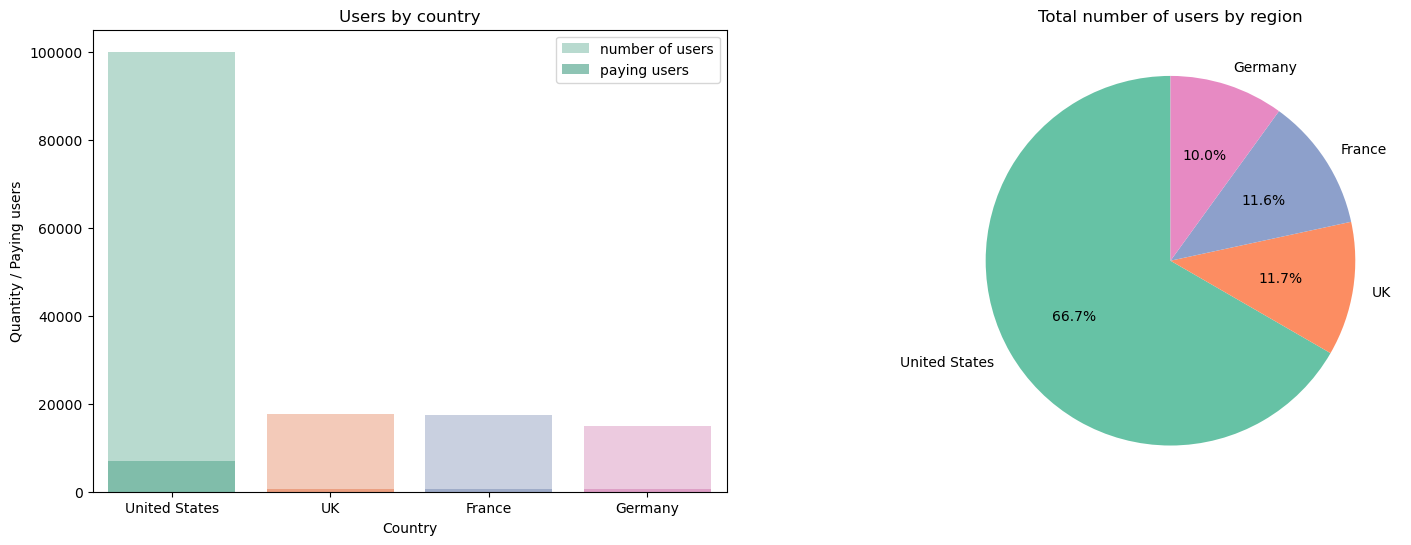

In [67]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# first chart
sns.barplot(x=paying_country_users.sort_values(by='users', ascending=False).index,
             y='users', data=paying_country_users.sort_values(by='users', ascending=False),
             ax=ax1, alpha=0.5, label='number of users', palette='Set2')

sns.barplot(x=paying_country_users.sort_values(by='users', ascending=False).index,
             y='paying_users', data=paying_country_users.sort_values(by='users', ascending=False),
             ax=ax1, alpha=0.8, label='paying users', palette='Set2')

ax1.legend()
ax1.set_xlabel('Country')
ax1.set_ylabel('Quantity / Paying users')
ax1.set_title('Users by country')

# second chart
pie = profiles['region'].value_counts()
labels = pie.index.tolist()
sizes = pie.values.tolist()

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
ax2.set_title('Total number of users by region')

plt.show()

* The most users in the application come from the US also from this country the most paying users and the highest proportion of paying to ordinary users.
* In second place are users who come from the UK, as well as paying users. Although the share of those paying is slightly higher in Germany.
* France is in third place for both users and paying users, although the share of paying users is the smallest.
* Germany is in fourth place, with a high proportion of paying users, but a small number of both ordinary users and paying users. But let's pay attention to this.

In [68]:
devices_users = profiles.groupby('device').agg({'user_id': 'nunique', 'payer':['sum', 'mean']})
devices_users.columns = ['users', 'paying_users', 'paying_share']
devices_users.sort_values(by='users', ascending=False).style.format({'paying_share': '{:.2%}'})

,users,paying_users,paying_share
device,,,
iPhone,54479,3382,6.21%
Android,35032,2050,5.85%
PC,30455,1537,5.05%
Mac,30042,1912,6.36%


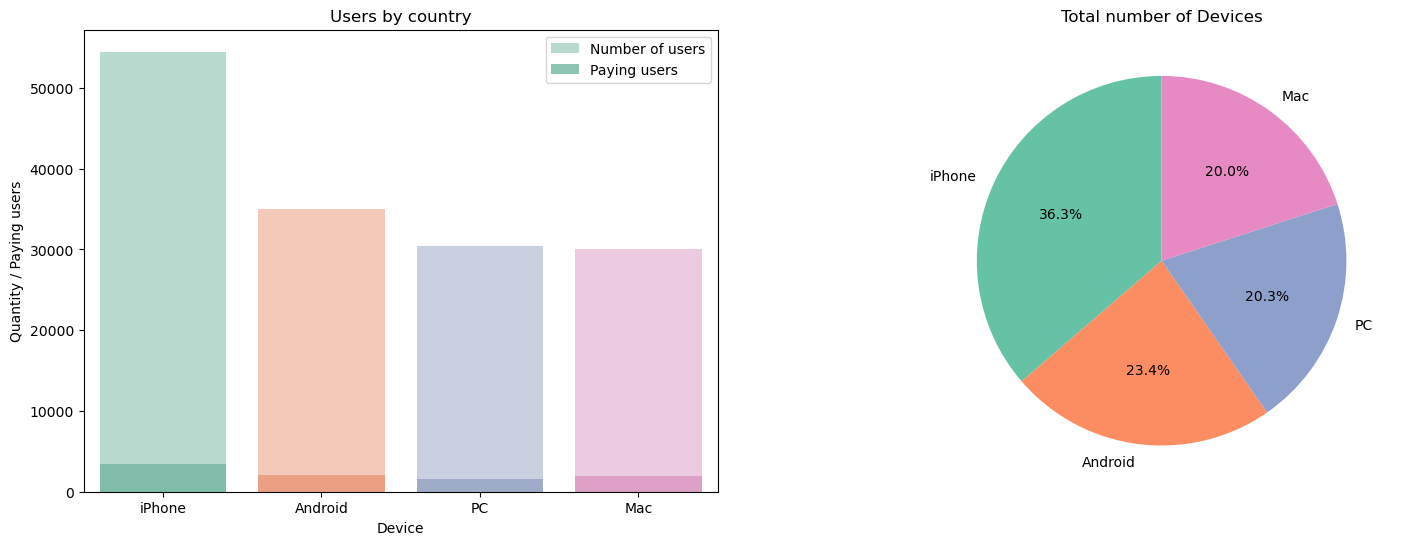

In [69]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))

# first chart
sns.barplot(x=devices_users.sort_values(by='users', ascending=False).index,
             y='users', data=devices_users.sort_values(by='users', ascending=False),
             ax=ax1, alpha=0.5, label='Number of users', palette='Set2')

sns.barplot(x=devices_users.sort_values(by='users', ascending=False).index,
             y='paying_users', data=devices_users.sort_values(by='users', ascending=False),
             ax=ax1, alpha=0.8, label='Paying users', palette='Set2')

ax1.legend()
ax1.set_xlabel('Device')
ax1.set_ylabel('Quantity / Paying users')
ax1.set_title('Users by country')

# second chart
pie = profiles['device'].value_counts()
labels = pie.index.tolist()
sizes = pie.values.tolist()

ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
ax2.set_title('Total number of Devices')

plt.show()

* iPhone users log in to the app the most, and there are also the most paying users among them, although the share of paying users is slightly less than that of the Mac platform.
* Android users are in second place, in terms of users and paying users, but in terms of the share of paying users in 3rd place (since on the second iPhone)
* In third place in terms of users and paying PC users, but the share of paying users is the lowest.
* Well, Mac is in fourth place, although the share of those paying is the highest

In [70]:
channel_users = profiles.groupby('channel').agg({'user_id': 'nunique', 'payer':['sum', 'mean']})
channel_users.columns = ['users', 'paying_users', 'paying_share']
channel_users.sort_values(by='users', ascending=False).style.format({'paying_share': '{:.2%}'})

,users,paying_users,paying_share
channel,,,
organic,56439,1160,2.06%
FaceBoom,29144,3557,12.20%
TipTop,19561,1878,9.60%
OppleCreativeMedia,8605,233,2.71%
LeapBob,8553,262,3.06%
WahooNetBanner,8553,453,5.30%
RocketSuperAds,4448,352,7.91%
MediaTornado,4364,156,3.57%
YRabbit,4312,165,3.83%


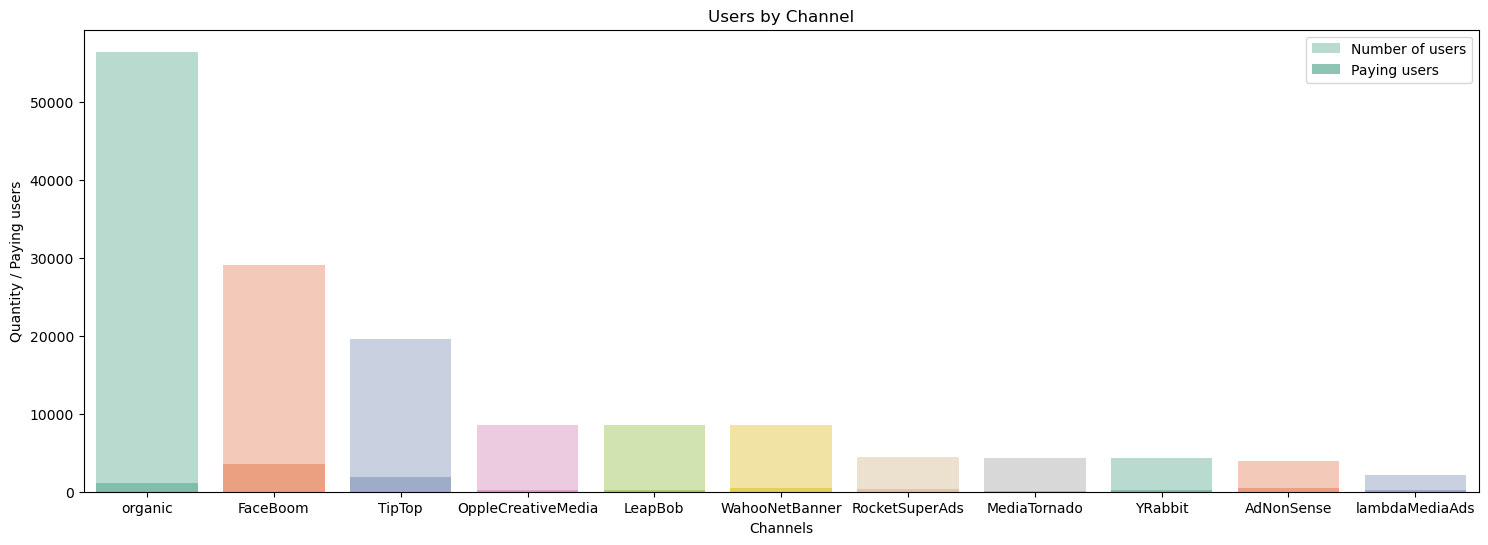

In [71]:
fig, ax = plt.subplots(figsize=(18, 6))

sns.barplot(
     x=channel_users.sort_values(by='users', ascending=False).index,
     y='users', data=channel_users.sort_values(by='users', ascending=False),
     ax=ax, alpha=0.5, label='Number of users', palette='Set2'
     )
sns.barplot(
     x=channel_users.sort_values(by='users', ascending=False).index,
     y='paying_users', data=channel_users.sort_values(by='users', ascending=False),
     ax=ax, alpha=0.8, label='Paying users', palette='Set2'
     )

ax.legend()
ax.set_xlabel('Channels')
ax.set_ylabel('Quantity / Paying users')
ax.set_title('Users by Channel')

plt.show()

* Of course, most of the transitions are from organic, there are also enough paying users out of all channels organic paying in 3rd place. But the share of those paying is the lowest.(Although we do not bear the costs of attracting them directly)
* * The Facebook channel is in second place both in terms of attracted users and paying users. The share of payers is the highest of all channels.
* The TipTop channel is in third place, although it is not in the top three in terms of the share of payers.
* Here we pay attention to the channels that attracted a few users, but the share of paying users is high AdNonSense, lambdaMediaAds and RocketSuperAds.

### Output:
* The US country with the highest rates of both users and payers and by the share of payers. And this country is an order of magnitude ahead of the nearest one.
* UK, France, Germany in these countries, the indicators differ by tenths of a percent
and are not so significant at first glance. But still, Germany users pay better than UK or France.(Why is there the smallest number of them.)
* Since we have a country with the highest US indicators, then devaice are distributed accordingly, in the first place the iPhone is significantly superior to the nearest both by users and by paying.
* Note the Mac platform of traffic from it in quantitative terms in last place, but the share of paying users is the highest among all platforms.
* Android also occupies a leading position. In general, the transition from phones is the most quantitative and in the spirit of the times.
* Closes the PC. 
* With channels, too, not everything is unambiguous, only FaceBoom and TipTop bring a lot of users and they have a high percentage of paying users.There are channels that have brought few users, but among them a good percentage of paying ones (AdNonSense, RocketSuperAds, lambdaMediaAds). There are channels where the attraction rates are not bad, and the percentage of paying is low (OppleCreativeMedia, LeapBob). Here you probably need to look at the distribution of the budget through the channels for attraction.

##4. Marketing
* Calculate the total amount of marketing expenses.
* Find out how the expenses are distributed by advertising sources, that is, how much money was spent on each source.
* Build a visualization of the dynamics of expenditure changes over time (by weeks and months) for each source. Try to reflect this on one chart.
* Find out how much it cost on average to attract one user (CAC) from each source. Use user profiles.

In [72]:
print(f"The total amount of marketing expenses is: {costs['costs'].sum().round(2):.2f}")

The total amount of marketing expenses is: 105497.30


Let's look at the distribution of this amount through the channels of attraction.

In [73]:
advertising_costs = costs.groupby('channel').agg({'costs': ['sum']})
advertising_costs.columns = ['Amount']
advertising_costs['Share %'] = round(advertising_costs['Amount'] / 105497.30 * 100, 1)
advertising_costs = advertising_costs.reset_index()
advertising_costs.sort_values(by='Amount', ascending=False)

,channel,Amount,Share %
6,TipTop,54751.30,51.9
1,FaceBoom,32445.60,30.8
7,WahooNetBanner,5151.00,4.9
0,AdNonSense,3911.25,3.7
4,OppleCreativeMedia,2151.25,2.0
5,RocketSuperAds,1833.00,1.7
2,LeapBob,1797.60,1.7
9,lambdaMediaAds,1557.60,1.5
3,MediaTornado,954.48,0.9
8,YRabbit,944.22,0.9


In [74]:
top_channel = costs.groupby('channel')['costs'].sum().sort_values(ascending=False)[:4]
others = costs.groupby('channel')['costs'].sum().sort_values(ascending=False)[4:].sum()
top_channel_others = pd.concat([top_channel, pd.Series(others, index=['Other'])])

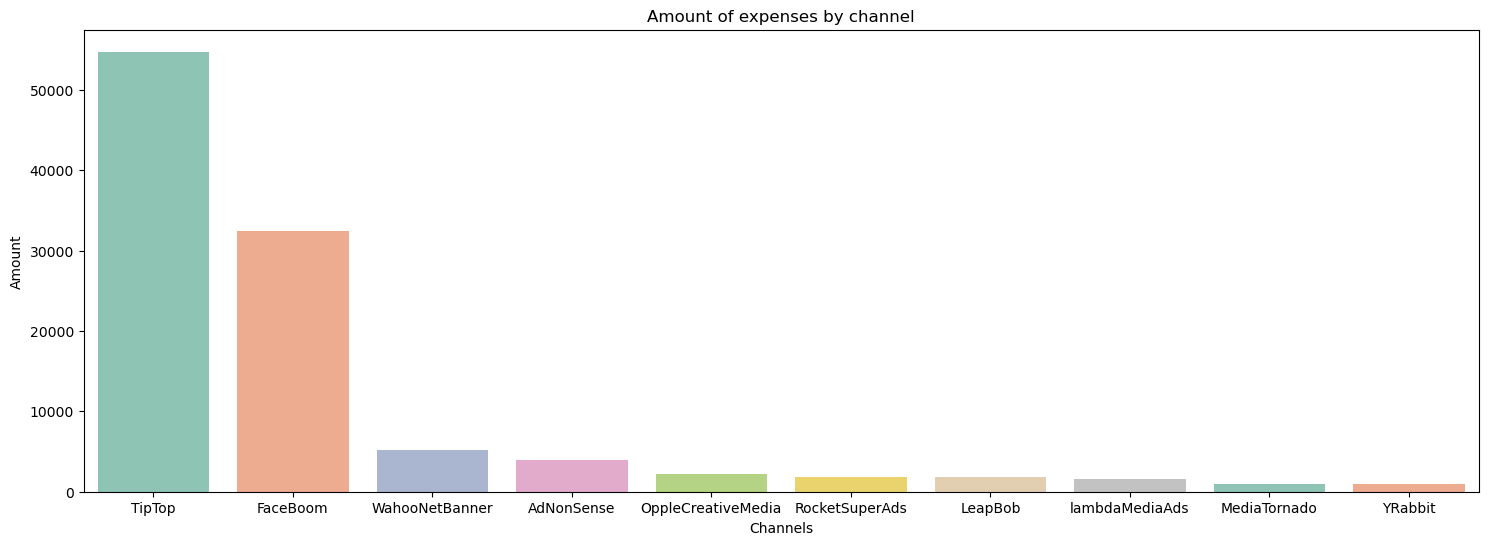

In [75]:
plt.figure(figsize=(18, 6))
sns.barplot(
    y='Amount', x='channel', 
    data=advertising_costs.sort_values(by='Amount', 
    ascending=False),
    alpha=0.8, palette='Set2'
    )

plt.title('Amount of expenses by channel')
plt.xlabel('Channels')
plt.ylabel('Amount')
plt.show()

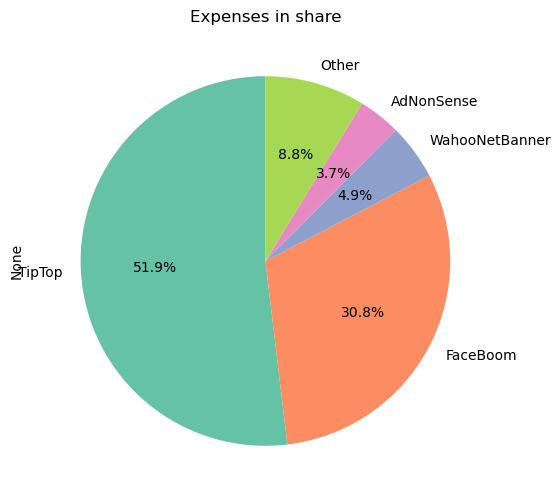

In [76]:
plt.figure(figsize=(12, 6))
top_channel_others.plot(kind='pie', autopct='%1.1f%%', startangle=90,colors=sns.color_palette('Set2'))
plt.title('Expenses in share')
plt.show()

As can be seen from the table and graph, the lion's share of the entire advertising budget (more than 82.7%) was spent on two channels TipTop and FaceBomm. And if the Facebook channel has the highest share of paying users, then the TipTop channel has the share of paying users in 4th place, and it eats 51.9% of the entire budget.
Two more WahooNetBanner channels, AdNonSense together 8.6%. But Ad Non Sense has 11.34% for paying users and WahooNetBanner has 5.30% (twice less), but at the same time the budget is larger.
In other words, 91% of the budget falls on channel 4 and 9% on all other sources(of which there are 6).

In [77]:
grouped_costs = costs.groupby(['channel', 'dt'])['costs'].sum().reset_index()

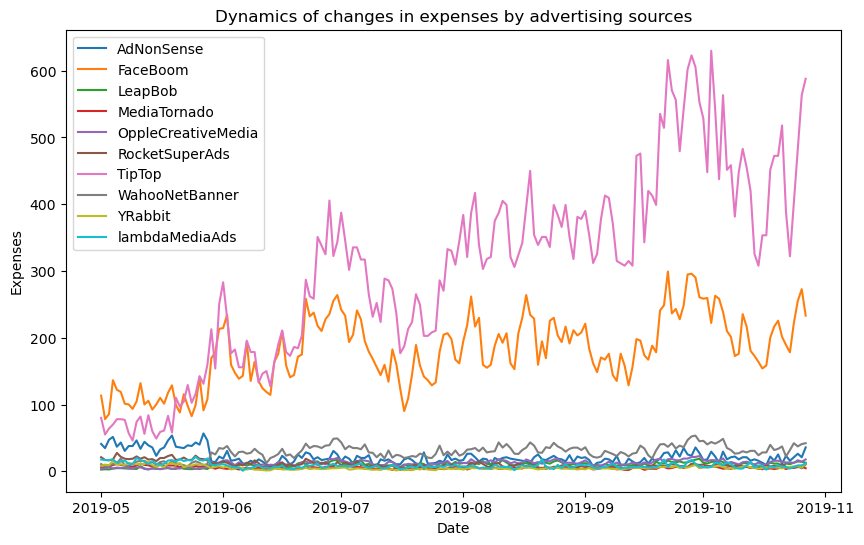

In [78]:
fig, ax = plt.subplots(figsize=(10, 6))

for channel in grouped_costs['channel'].unique():
     data = grouped_costs[grouped_costs['channel'] == channel]
     ax.plot(data['dt'], data['costs'], label=channel)

ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Expenses')
ax.set_title('Dynamics of changes in expenses by advertising sources')
plt.show()

In dynamics, you can see an increase in investments in the same channels (TipTop and FaceBoom) during the entire study period, the AdNonSense channel raises the question at the beginning of May 2019 and almost the whole month was actively invested in it, and since June the infusion into this channel has been seriously reduced. 
while the other channels of attraction remain constant, and the level of investment in them is much lower and more stable.

Let's find out how much it cost on average to attract a user, for each channel.

In [79]:
mean_cost_user = profiles.query('channel != "organic"').groupby('channel')['acquisition_cost'].mean().round(2).sort_values(ascending=False)
mean_cost_user

channel
TipTop                2.80
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.72
WahooNetBanner        0.60
RocketSuperAds        0.41
OppleCreativeMedia    0.25
MediaTornado          0.22
YRabbit               0.22
LeapBob               0.21
Name: acquisition_cost, dtype: float64

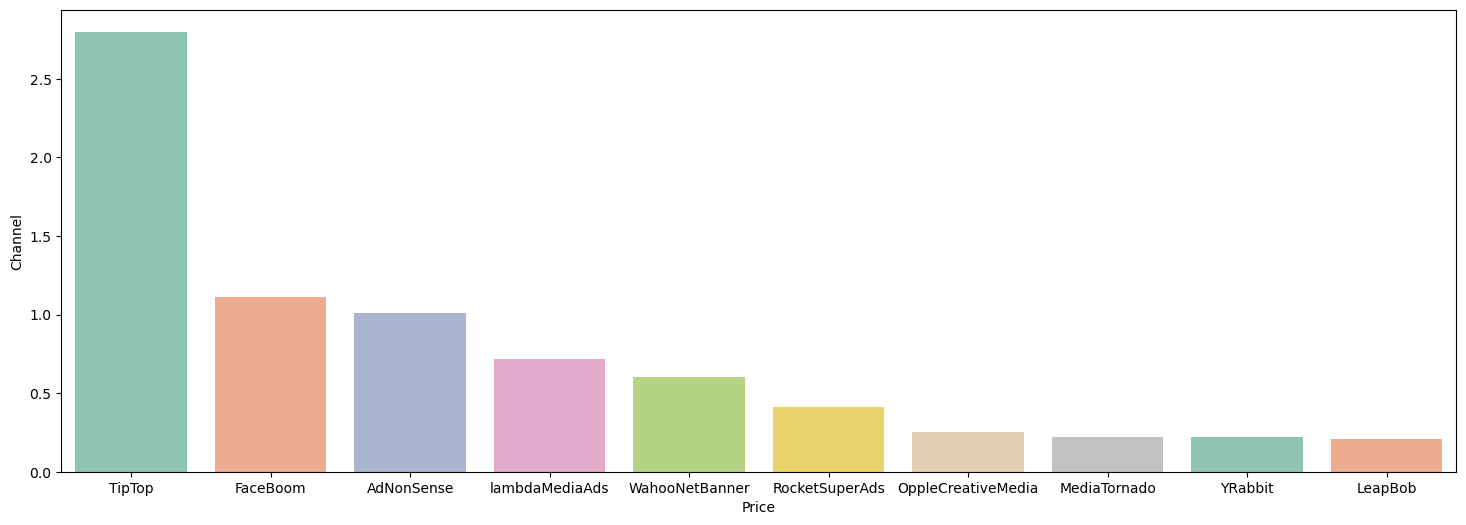

In [80]:
plt.figure(figsize=(18, 6))
sns.barplot(x=mean_cost_user.index, y=mean_cost_user.values, alpha=0.8, palette='Set2')


plt.xlabel('Price')
plt.ylabel('Channel')
plt.show()

The cost of acquisition varies significantly from channel to channel. The highest are TipTop (an order of magnitude higher than the nearest one), FaceBoom, AdNonSense (all three channels have an acquisition cost above 1 dollar). Then a group where the cost of attraction is from 0.41 to  0.72, lambdaMediaAds, WahooNetBanner, RocketSuperAds. And the third group where the cost of attraction is from 0.21 to 0.25, OppleCreativeMedia, MediaTornado, YRabbit, LeapBob.

In [81]:
print('Average СAC:', profiles.query('channel != "organic"')['acquisition_cost'].mean())

Average СAC: 1.127481323942928


### Conclusion:
* More than half of the budget falls on one TipTop channel, which is in third place in terms of users and paying users, and in terms of the share of paying users by 4. The amount of user engagement is orders of magnitude ahead of the nearest FaceBoom 2.80$ to 1.11$.
*  Note that the Facebookcom channel attracts users and the share of paying users the best the highest. But also the budget costs 30.8% of the total.
*  Dynamics shows that invisitions in two channels TipTop and Facebook are constantly growing.
* Investments in other channels are stable and fluctuate around certain levels.

## 5. Evaluate the payback of advertising
* Using LTV, ROI and CAC charts, analyze the payback of advertising. Consider that November 1, 2019 is on the calendar, and the business plan stipulates that users should pay off no later than two weeks after the attraction. Determine the need to include organic users in the analysis yourself.
* Analyze the payback of advertising using LTV and ROI charts, as well as LTV, CAC and ROI dynamics charts.
* Check the user conversion rate and the dynamics of its change. Do the same with user retention. Build and study conversion and retention charts.
* Analyze the payback of advertising by device. Plot LTV and ROI graphs, as well as LTV, CAC, and ROI dynamics graphs.
* Analyze the payback of advertising by country. Plot LTV and ROI graphs, as well as LTV, CAC, and ROI dynamics graphs.
* Analyze the payback of advertising by advertising channels. Plot LTV and ROI graphs, as well as LTV, CAC, and ROI dynamics graphs.


Answer these questions:
* Does advertising aimed at attracting users in general pay off?
* Which devices, countries and advertising channels can have a negative impact on the payback of advertising?
* What can cause payback problems?
Write a conclusion, describe the possible causes of the detected problems and interim recommendations for the advertising department.

In [82]:
observation_date = datetime(2019, 11, 1).date()  # moment of analysis
horizon_days = 14   

In [83]:
profiles = profiles.query('channel != "organic"') 

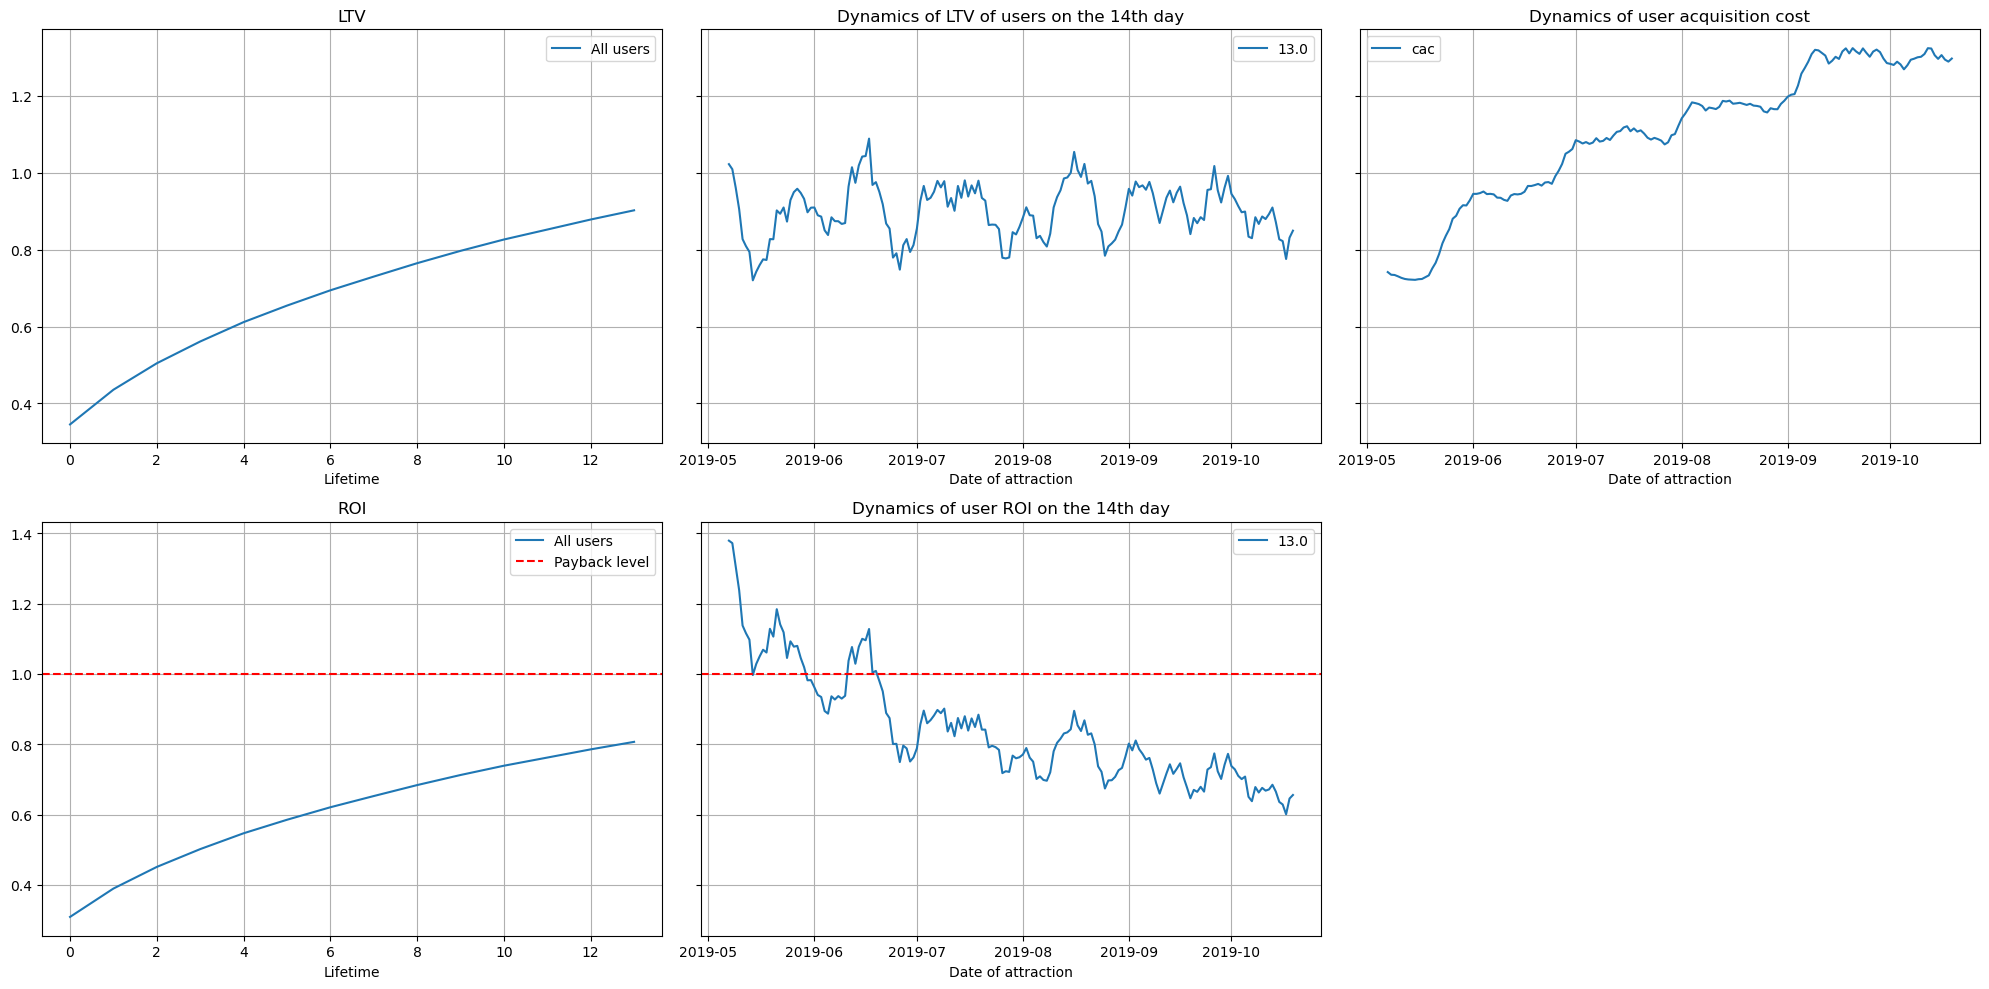

In [84]:
# count LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)
# create charts
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

According to the graphs , you can draw the following conclusions:
* Advertising does not pay off. ROI at the end of the week is slightly above 60%.
* CAC is growing. This means that an increase in the advertising budget affects the level of payback.
* ROI drops almost drops as CAC grows
* LTV is stable enough
* * The payback level is $ 1 (Which means the entire group of channels whose cost of attraction is higher than $ 1 TipTop, Facebook, Ad Non Sense) without profit.

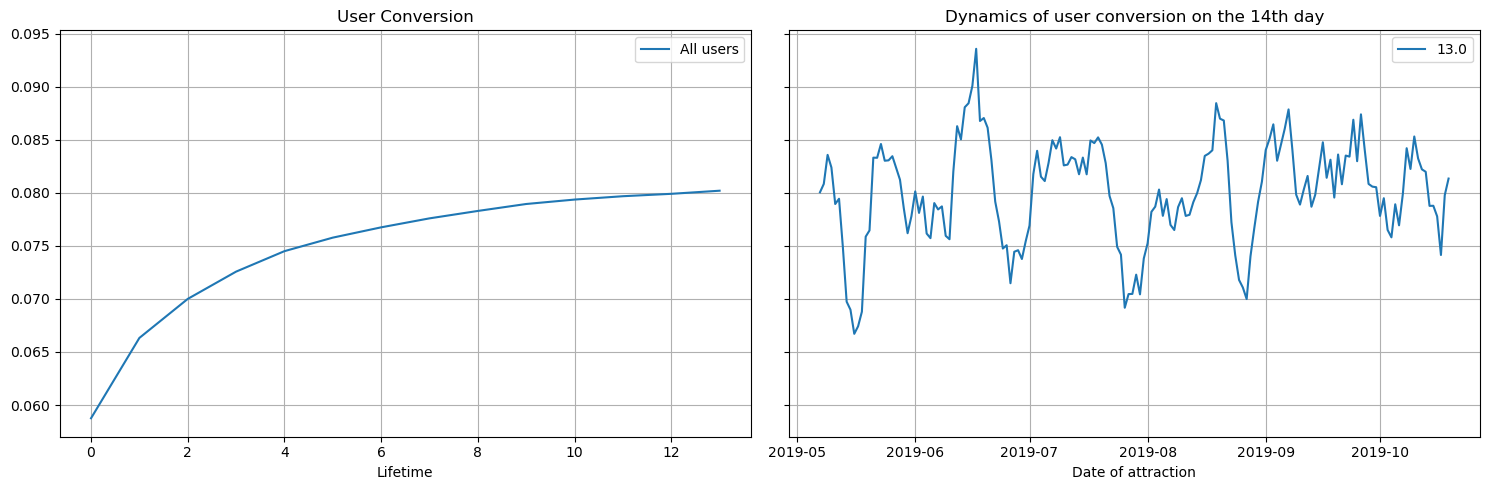

In [85]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

The graph means that most users don't perform the actions we expect them to. The conversion rate is quite low.

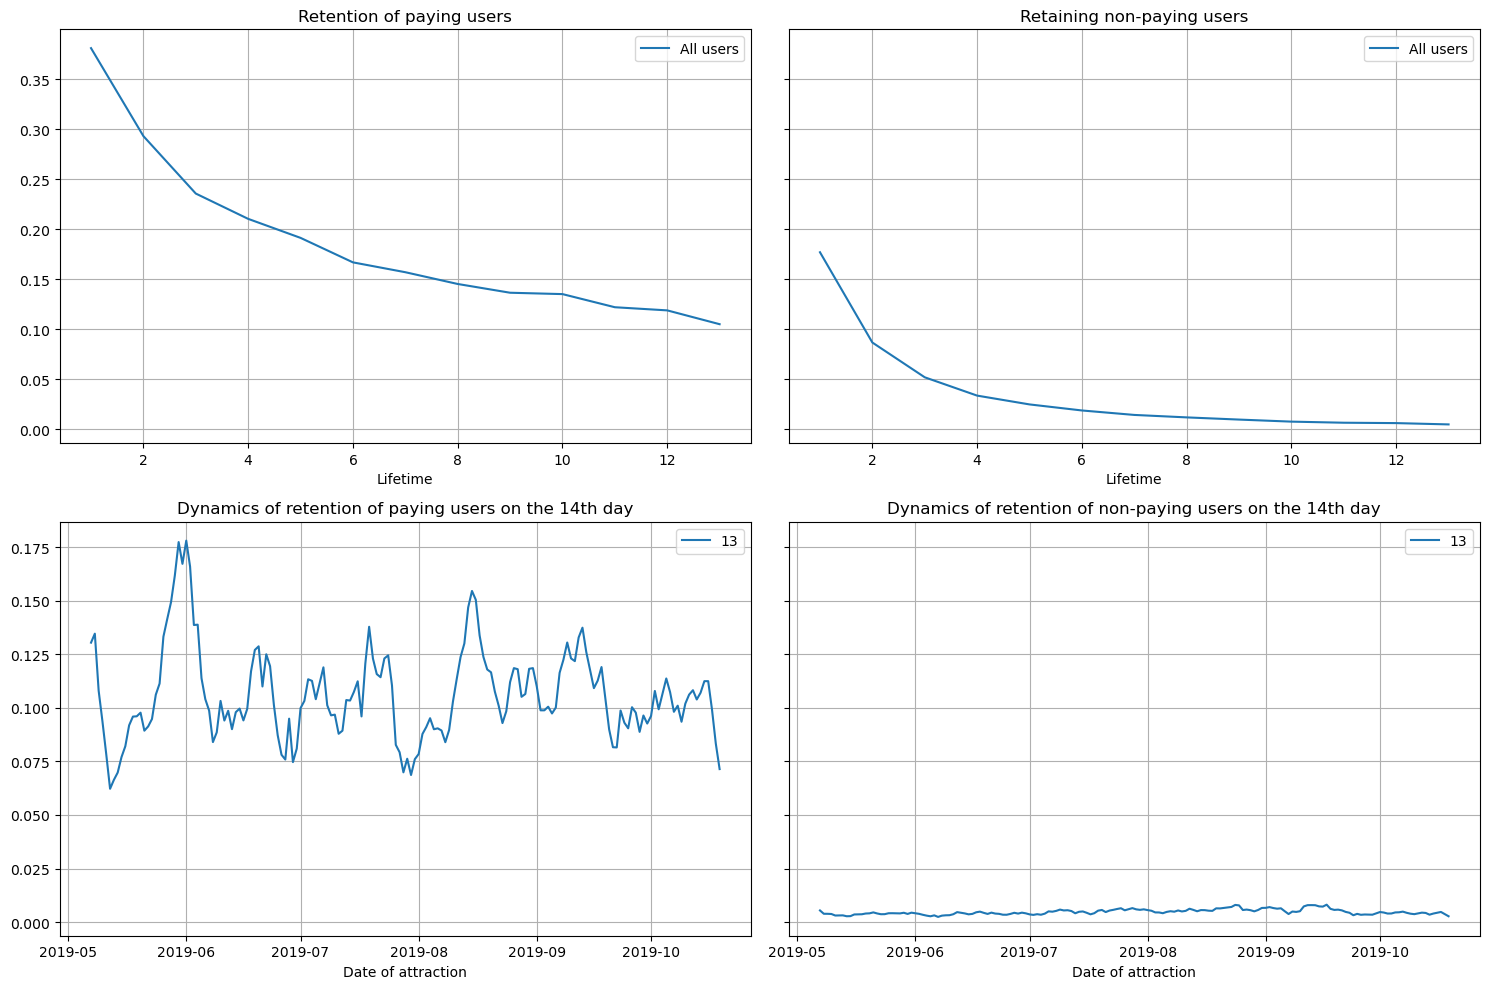

In [86]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days)

For an entertainment application, the Retention Rate of 10% is quite low if our application is intended for continuous use.
It may be necessary to conduct an analysis and identify the reasons why users do not return to the platform.

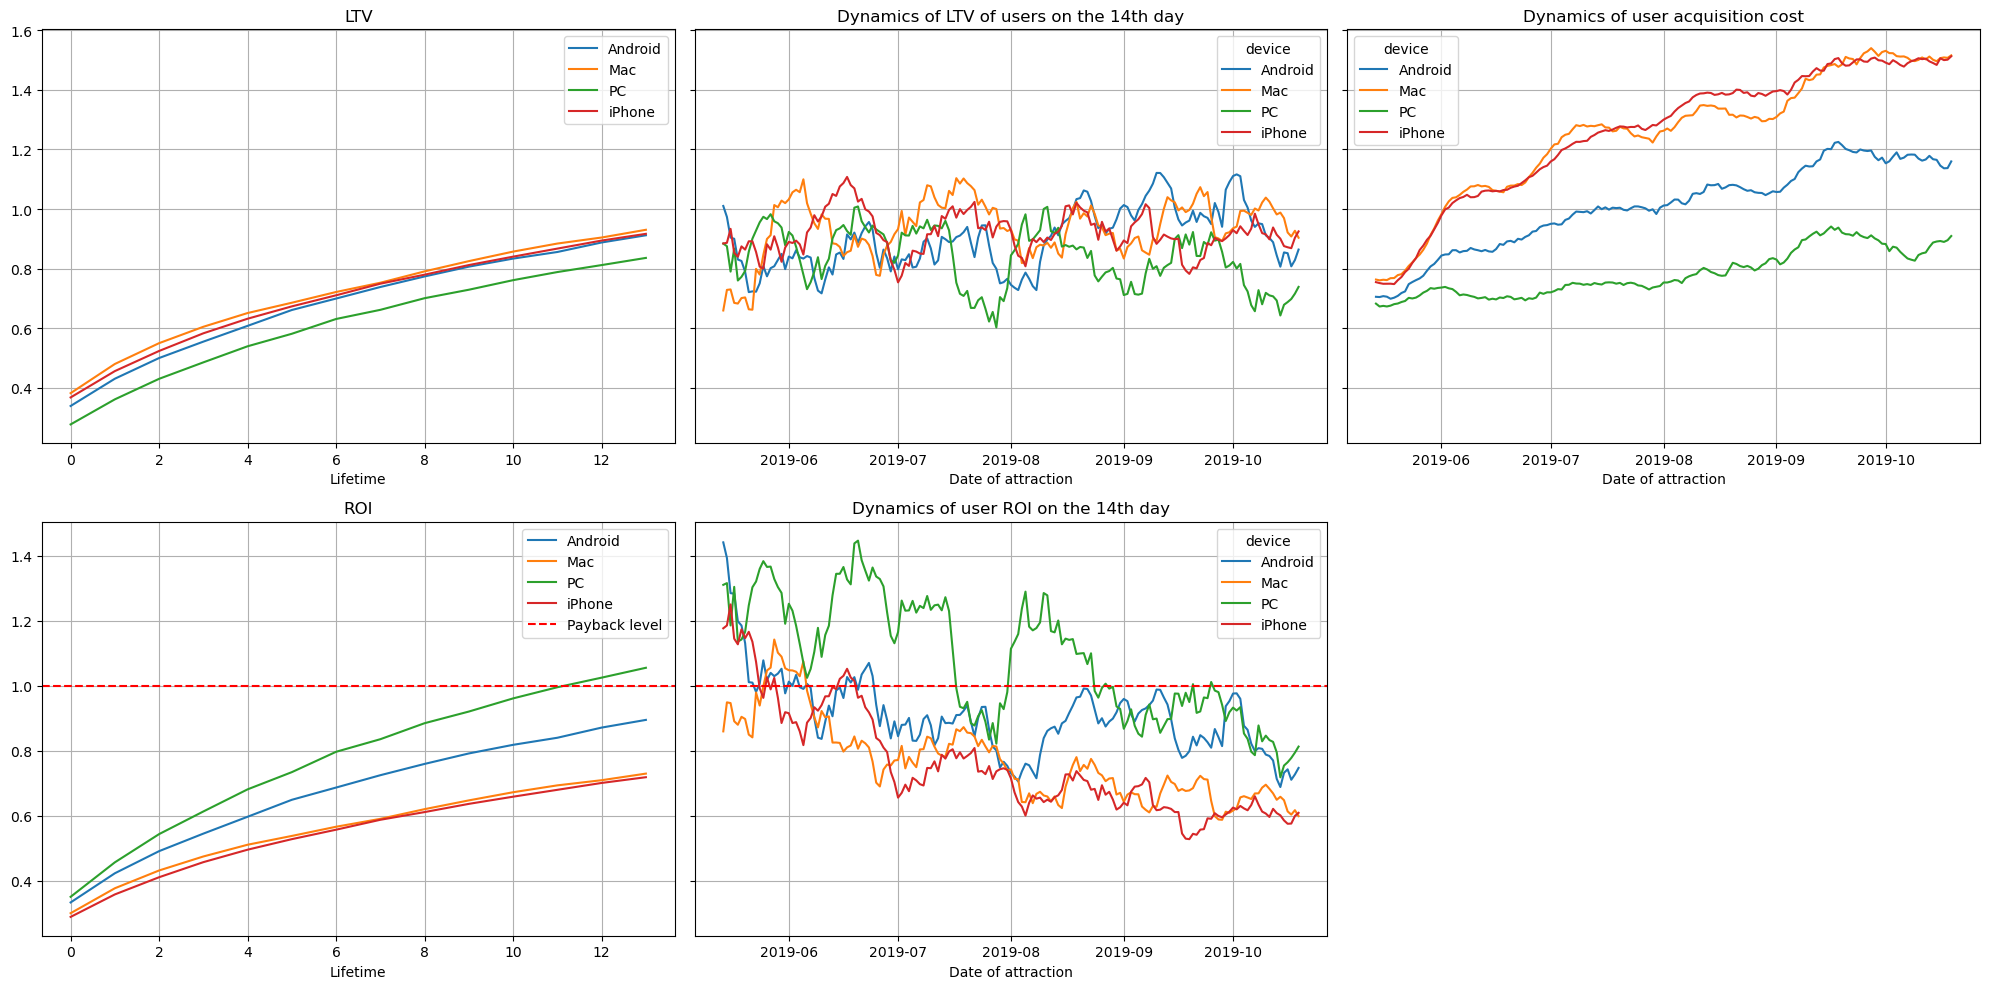

In [87]:
# count LTV и ROI по device
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['device']
)
# create charts
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

* * Advertising pays off on PC owners, and Android, Mac and iPhone will not pay off from the word at all.
* * The dynamics of attraction is growing for all device owners, but for iPhone and Mac CAC is growing more dynamically.
* ROI drops too for everyone but especially deeply, again for iPhone and Mac
* LTV is stable for all

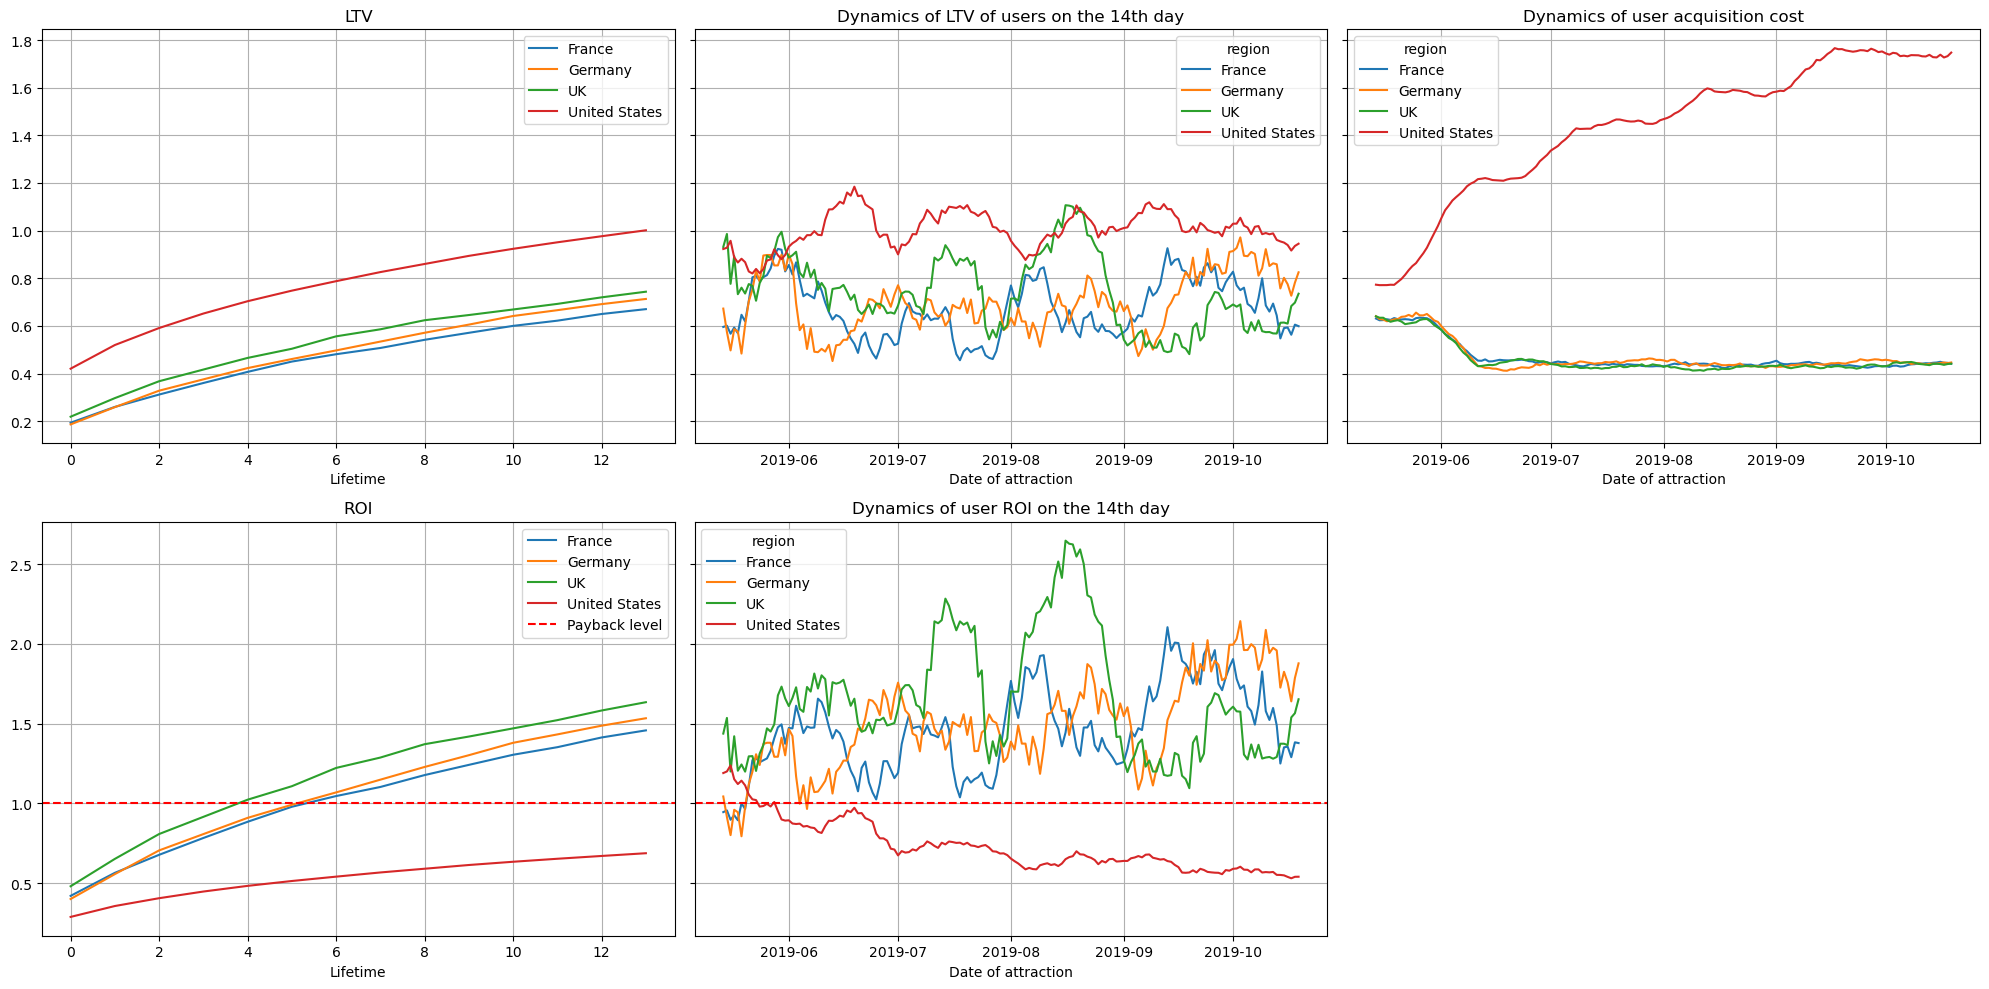

In [88]:
# count LTV и ROI по region
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions = ['region']
)
# create charts
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

So there was a country that affects the indicators of this US, although the LTV of these users is the highest, but the ROI has dropped to 55%, the cost of attracting is constantly growing. The only country that does not overcome the payback threshold.And although this is the largest country both in terms of the number of users, in terms of the number of paying users, as well as in terms of the share of paying users. But the costs of attracting seriously exceed the level of payback. With a payback level of $1, CAC is $1.75.

Therefore, I will try to figure out the USA region separately.

In [89]:
profiles_usa = profiles.query("region == 'United States'") 

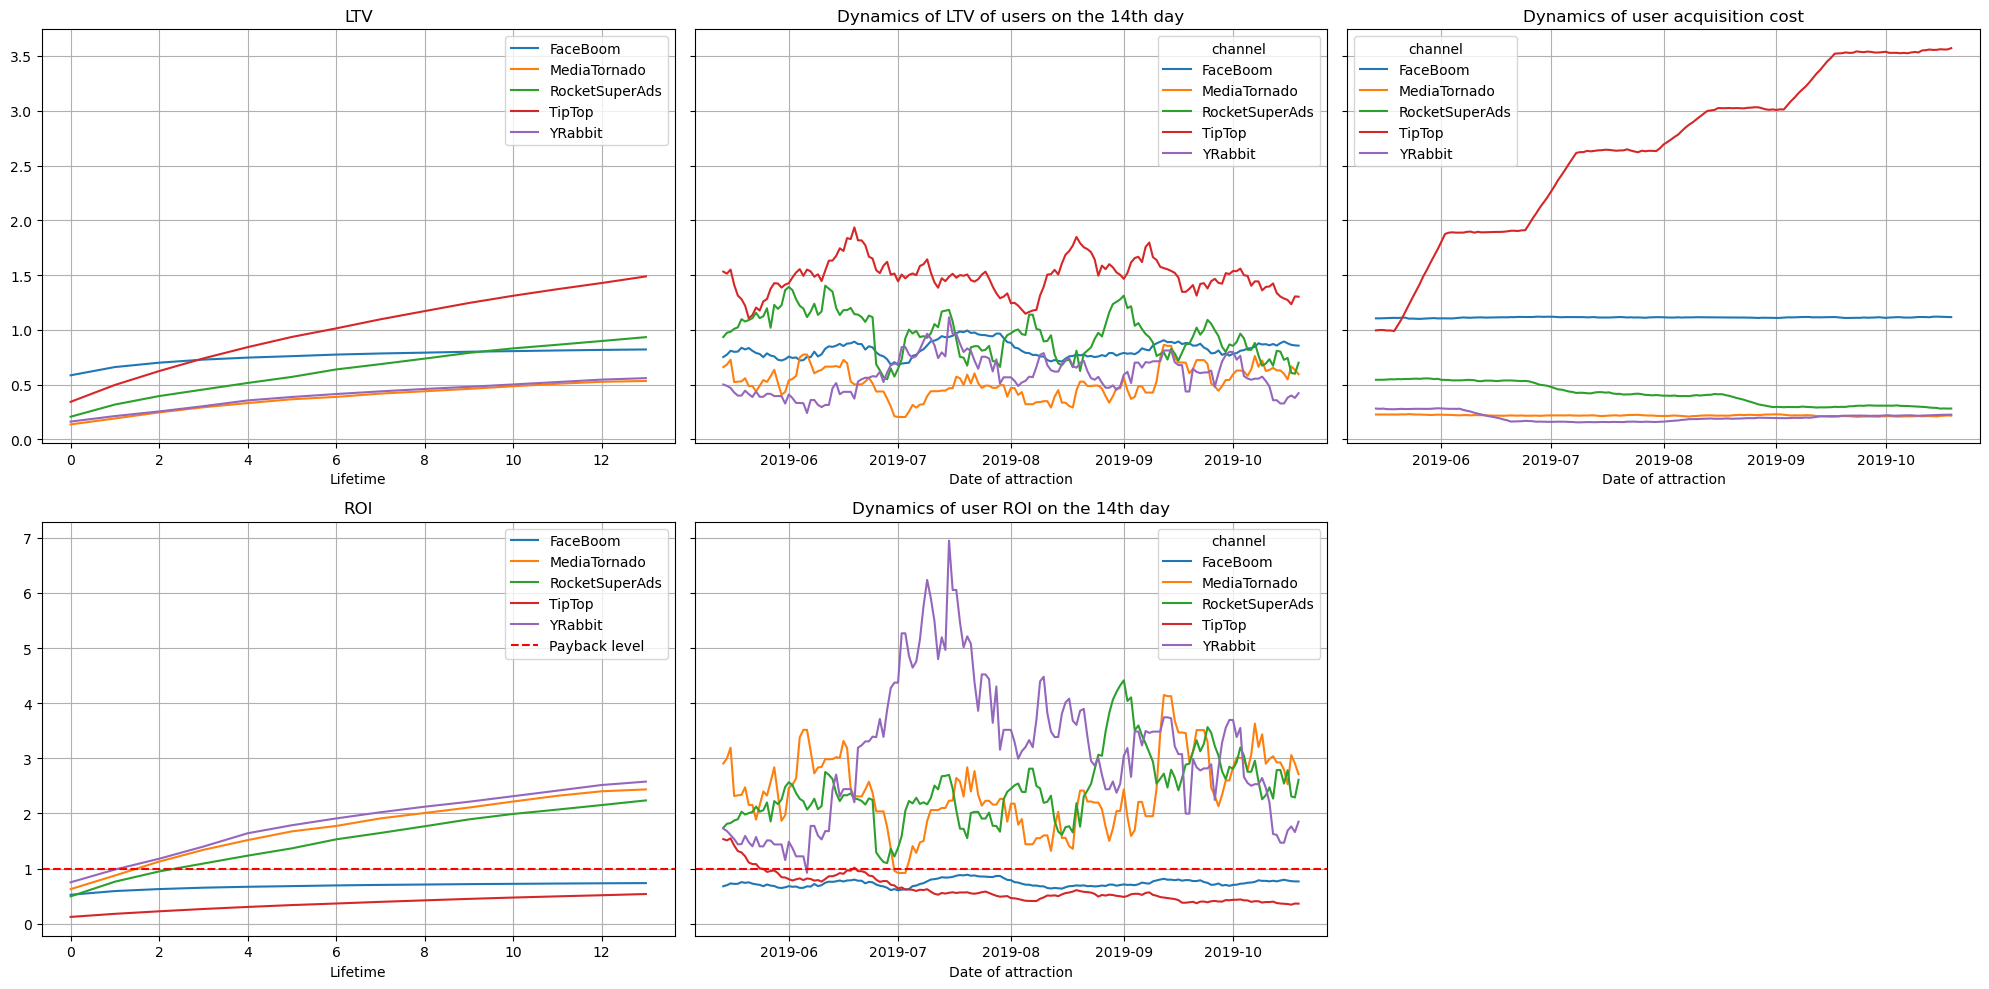

In [90]:
# count LTV и ROI по channel
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions = ['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

Everything is as expected TipTop is the highest LTV, CAC is growing very much, the payback level is the lowest, ROI drops to 50%. Well, Facebook has a stable LTV, CAC at the same level, but it cannot overcome the payback level. The ROI fluctuates around 90%. All other channels almost immediately pass the break-even point.

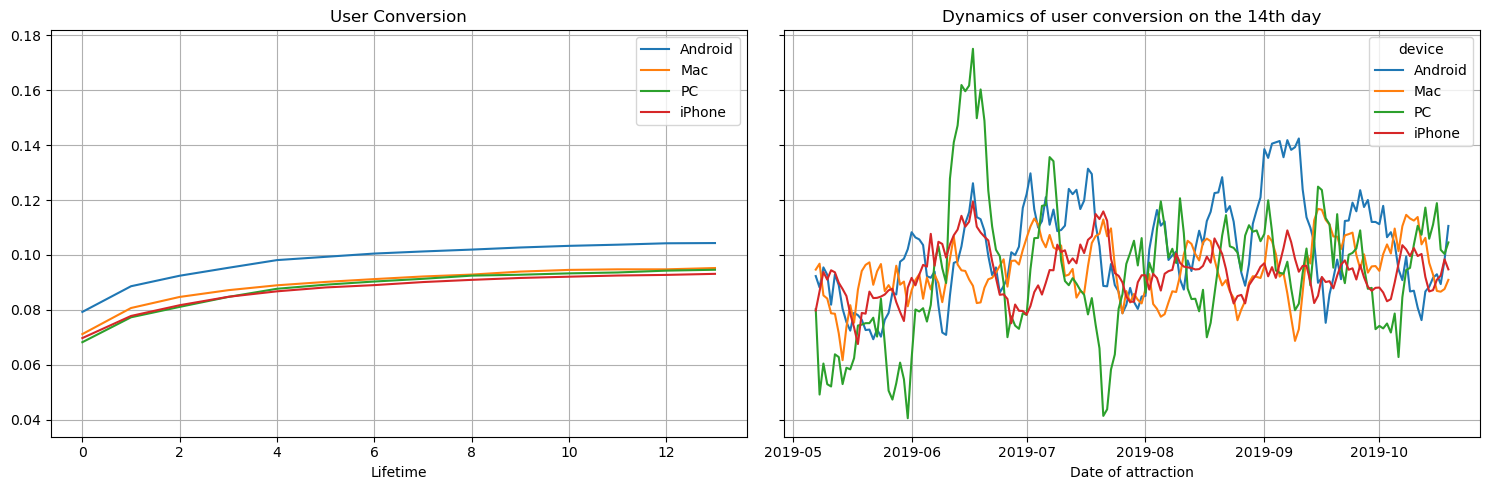

In [91]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_usa, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Judging by the graphs, all users are converting well, and constantly. Apparently, it's about retention.
Android users are consistently above all and more than 10%.(which is strange for US where the iPhone has captured phones)
The iPhone has the lowest conversion rate.

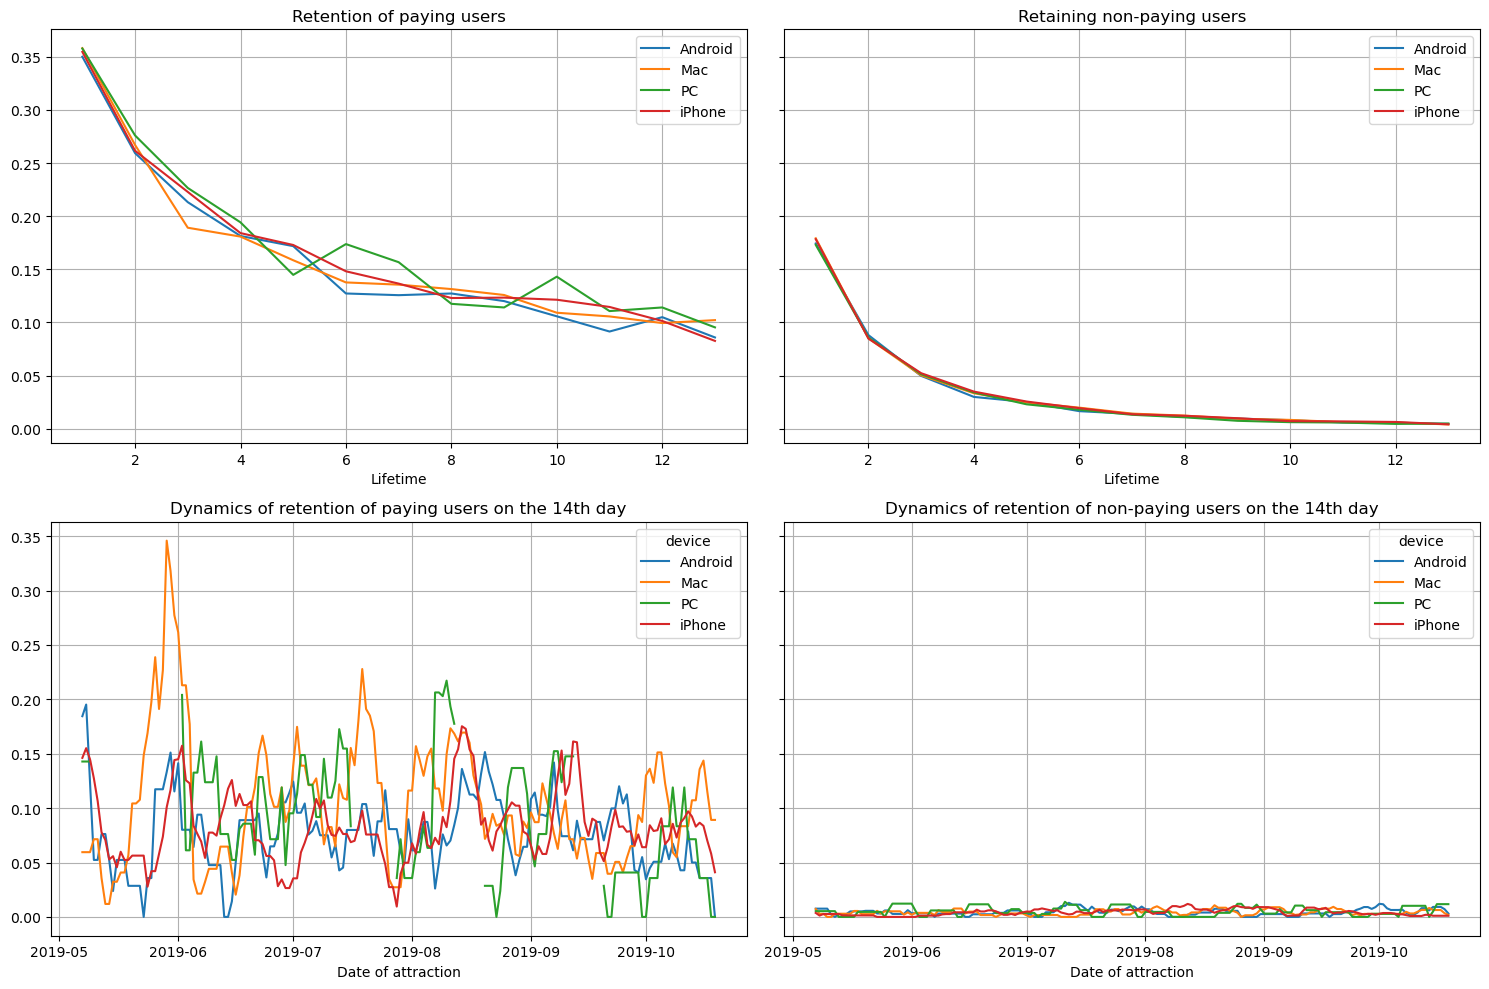

In [92]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_usa, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Users of all devices are consistently poorly retained.
Retention of 14 days at very low rates. With retention in the US, things are bad.
* * Two channels TipTop and Facebook have been identified, but there is also an Ad Non Sense channel that does not work in the US.(but has a cost of attraction above the payback level)
* * And three channels Media Tornado, Rocket Super Ads, YRabbit. Which payback point pass on the second day, stable LTV.
* Not all channels work in US

Conclusion:
* Only users who came to the application from advertising channels TipTop and FaceBoom lead to losses. At the same time, TipTop demonstrates the highest and most stable LTV, but its CAC is constantly growing. For every $1 received from customers, $3.50 is required to be spent on customer acquisition, resulting in an ROI of no more than 50%.
* FaceBoom is also not profitable and although its LTV is higher than some other channels, its CAC is still not enough to break even at $1.1.
* Three channels MediaTornado, RocketSuperAds, YRabbit. Which pass the payback point on the second day, stable LTV.
* Good conversion, not bad dynamics.
* Poor user retention.

These advertising channels are used only to attract customers from the United States, so the loss is solely due to advertising costs in this region.

EU region

In [93]:
profiles_eu = profiles.query('region != "United States"') 

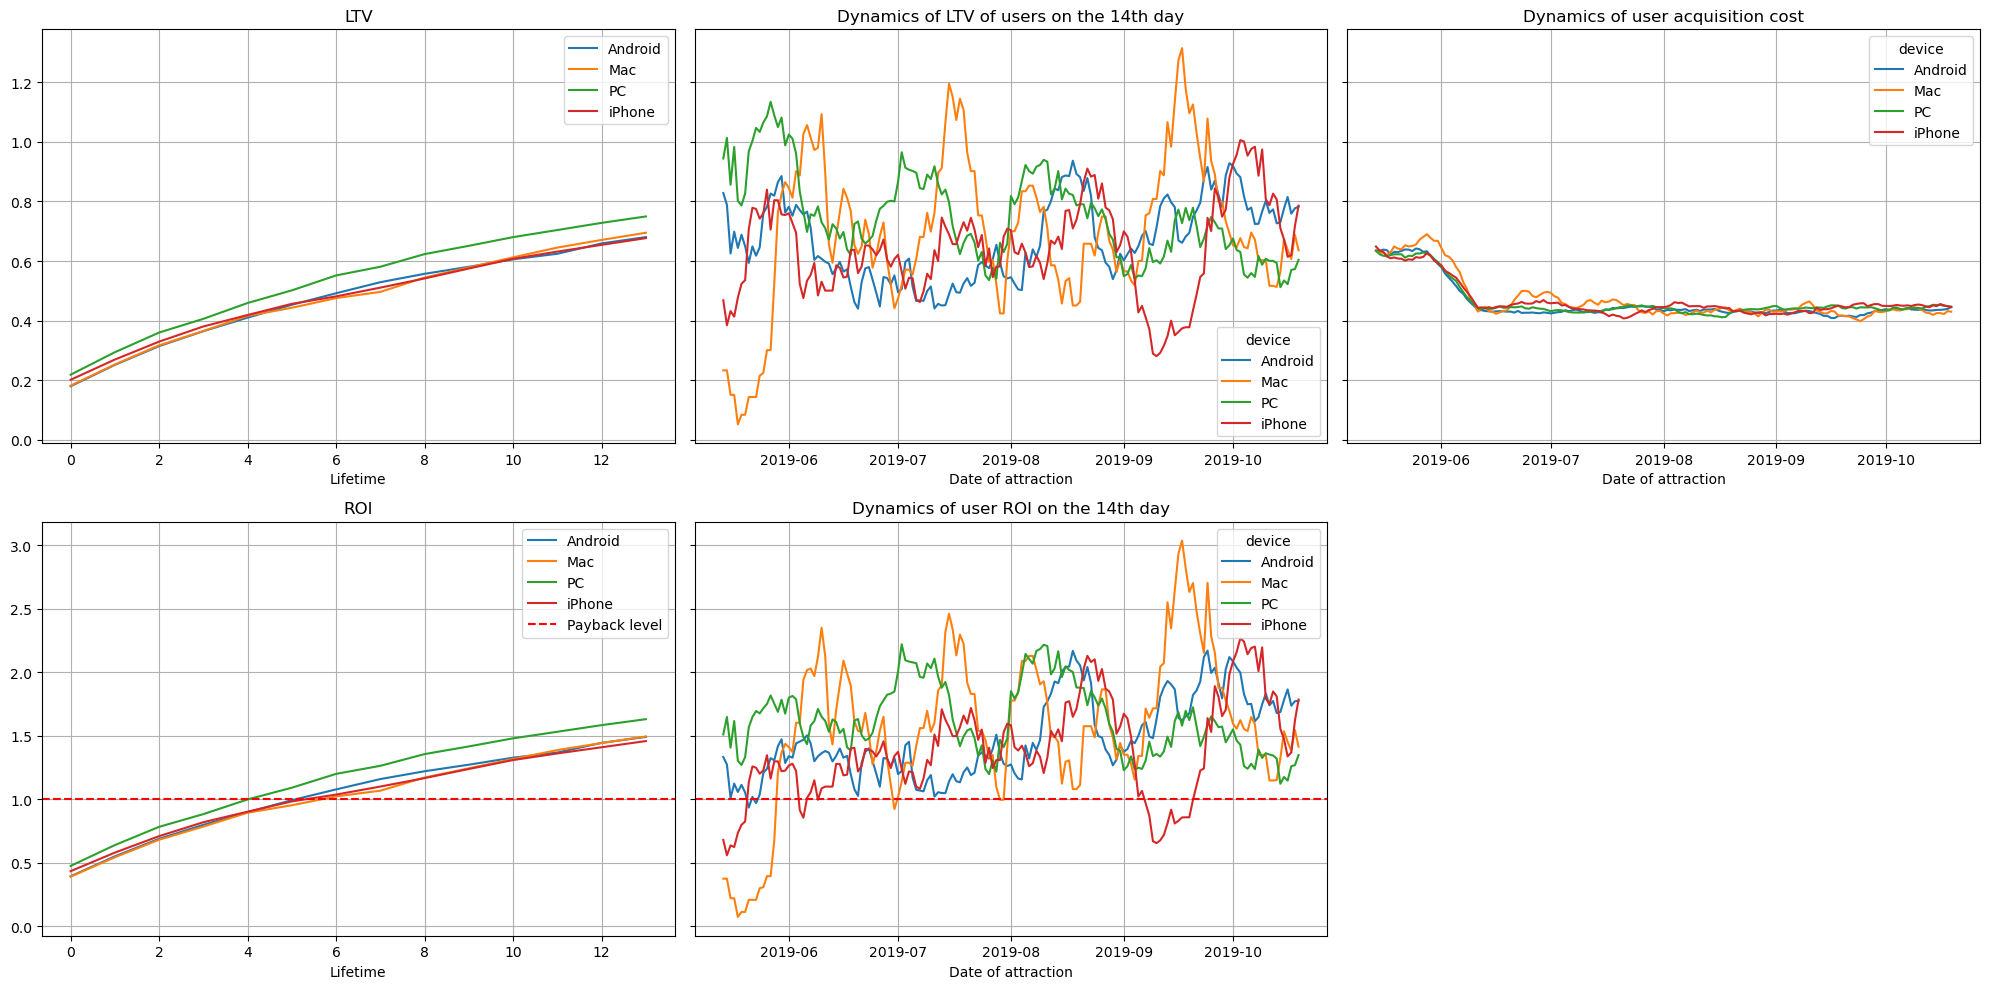

In [94]:

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eu, orders, observation_date, horizon_days, dimensions = ['device']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

In Europe, all devices pass the payback level in 4-6 days. CAC fell at first but leveled off and is stable. LTV repeats ROI and although the ROI of the iPhone will also sometimes fall below 100, it still allows you to recoup the acquisition costs.

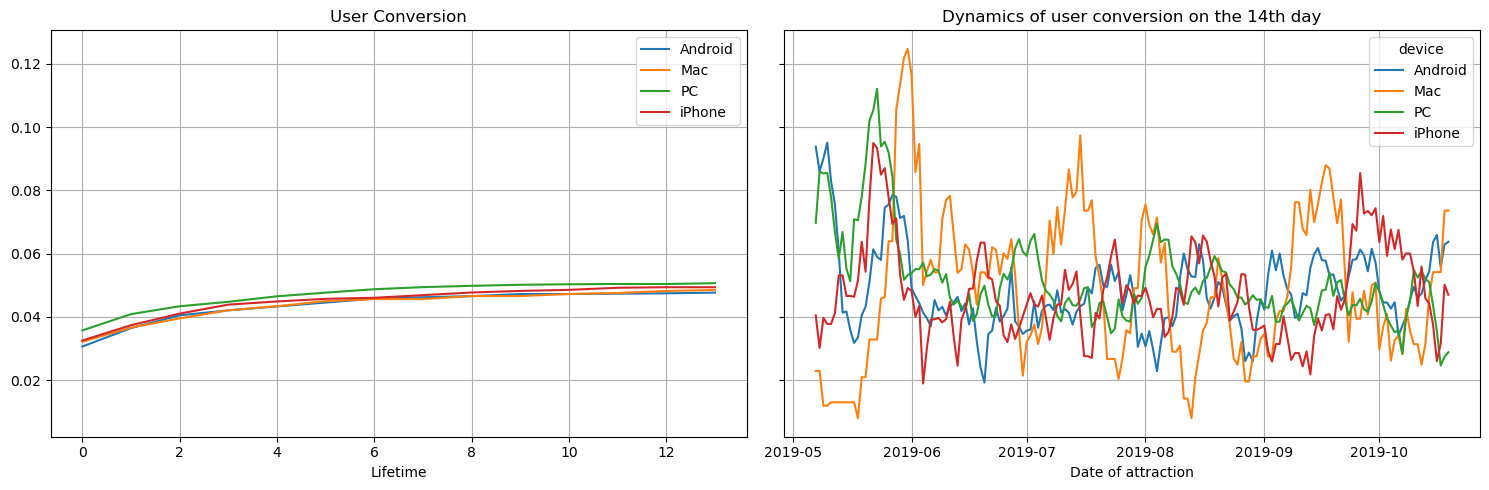

In [95]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_eu, orders, observation_date, horizon_days, dimensions=['device']
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

Judging by the graphs, conversion in Europe is noticeably worse than in America. All users are approximately at the same bad level of 5%

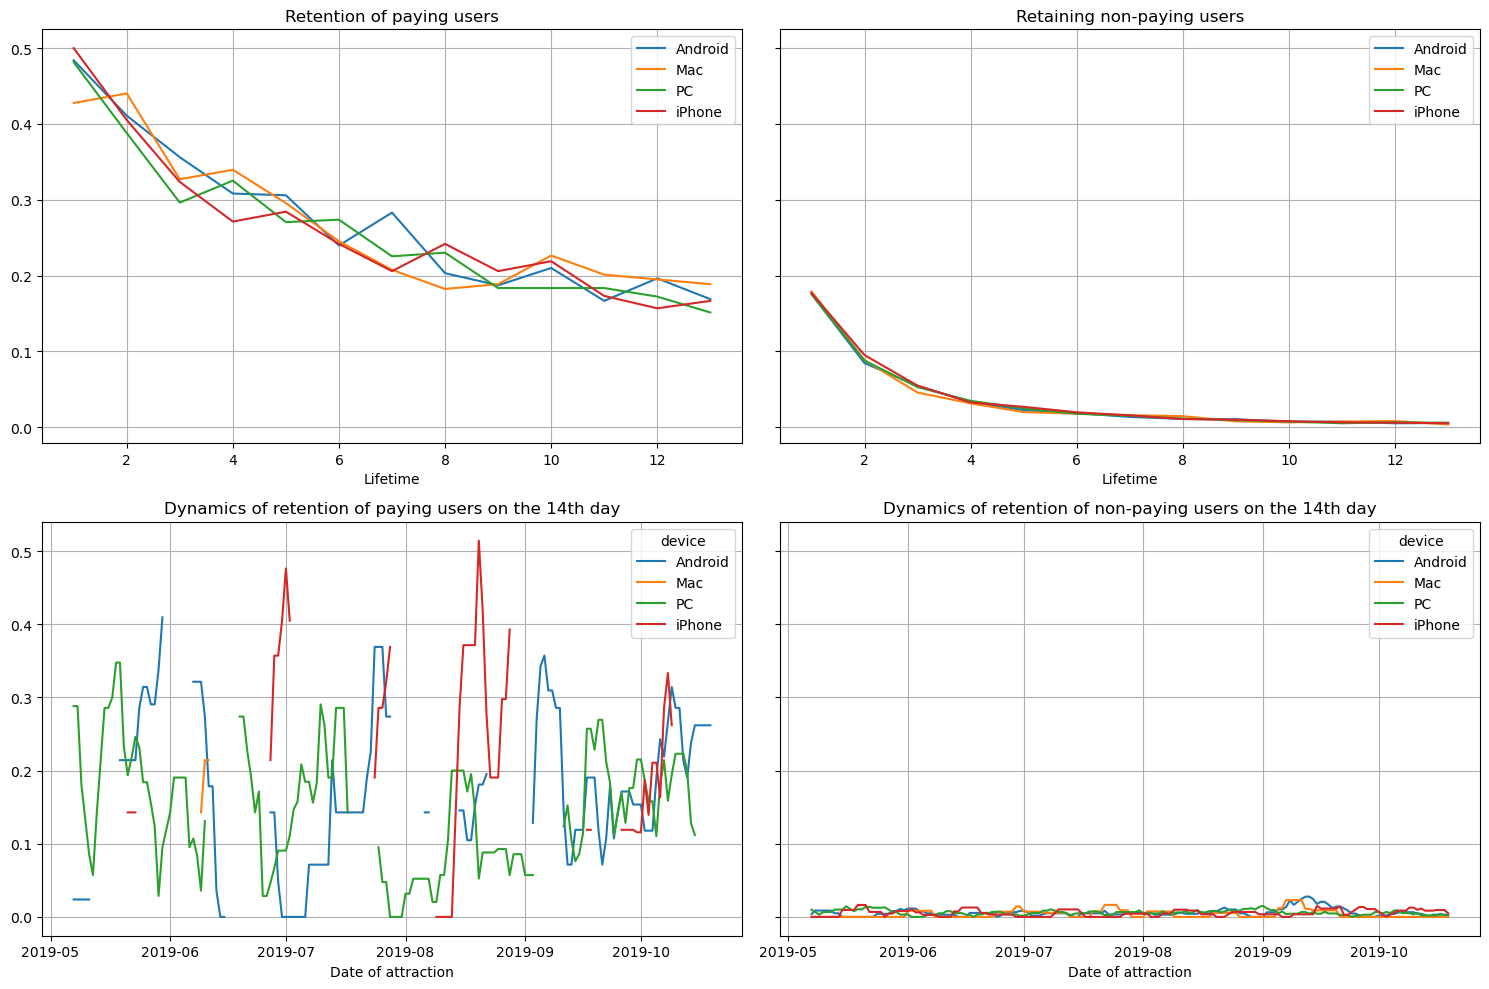

In [96]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_eu, visits, observation_date, horizon_days, dimensions=['device']
)

plot_retention(retention_grouped, retention_history, horizon_days)

The retention rate in European countries is twice as high as in the States.

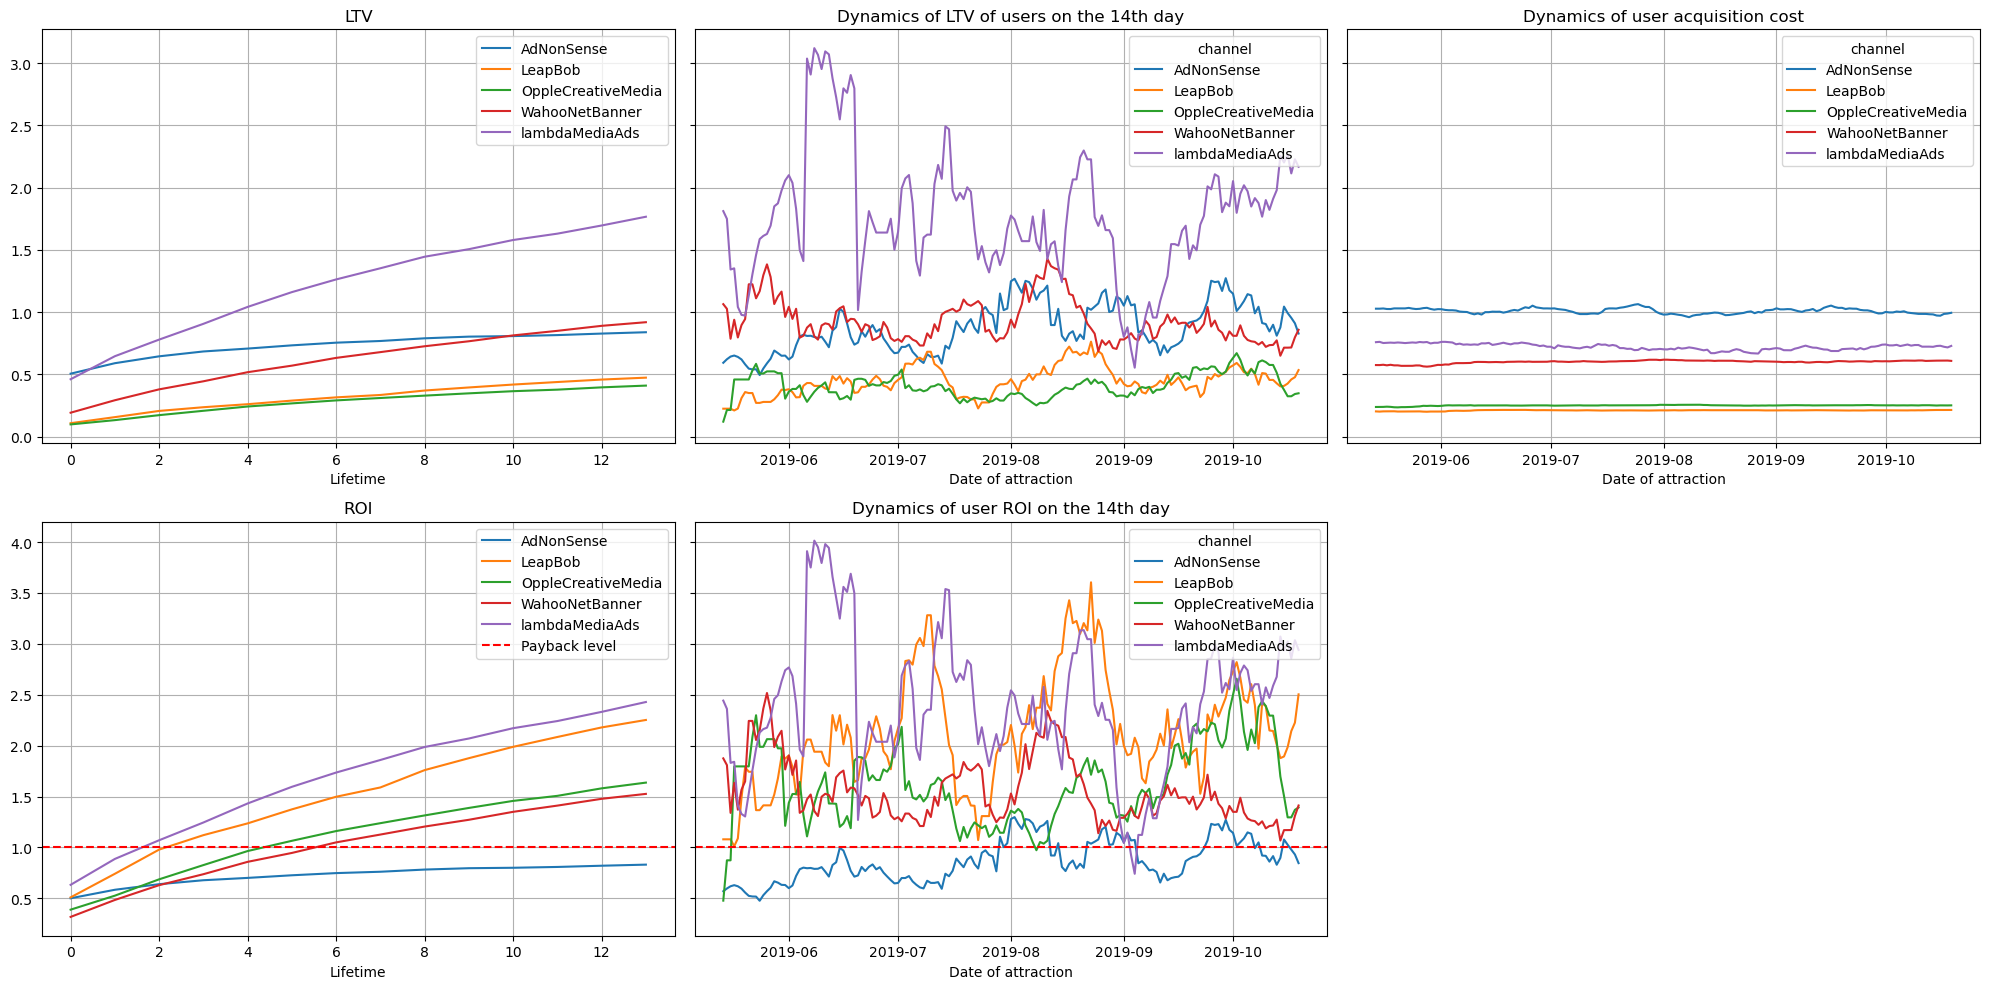

In [97]:

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_eu, orders, observation_date, horizon_days, dimensions = ['channel']
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14)

And here is the AdNonSense channel, the only one in Europe through which the acquisition costs do not pay off. Although for some periods of time the ROI rises above 100, in general the acquisition channel does not work as it should.
* We found out that the recruitment channels in Europe and the States are different and do not overlap.

Conclusion:
* In Europe, the payback level for devices is achieved in 4-6 days, while the CAC first decreases, but then stabilizes. LTV replicates ROI, and although iPhone ROI may fall below 100, it still allows you to recoup your acquisition costs.
* On the other hand, conversion in Europe is lower than in America, and all users are at approximately the same level of around 5%. It was also revealed that the AdNonSense acquisition channel in Europe does not pay off, although the ROI rises above 100 for some periods of time.
* Four channels LeapBob, OppleCreativeMedia, WahooNetBanner, LambdaMediaAds have good payback rates, LTV dynamics and ROI indicators.
*Low conversion
* The retention rate in Europe is twice that of the USA.
* It is important to note that acquisition channels in Europe and the US are different and do not overlap, which is one of the reasons for the differences in indicators.

General conclusion:

The data contains information about new app users who registered from May 1, 2019 to October 27, 2019, their purchases during this period, as well as advertising spending statistics. For ease of analysis, the data was pre-processed: the column names were corrected, the data type in the date columns was changed from object to datetime, and the data was checked for omissions and duplicate values.

From the data analysis it is clear that not all advertising channels and regions have a positive impact on the return on advertising. Some channels, such as TipTop and FaceBoom in the US and AdNonSense in Europe, do not pay at all, which leads to losses. At the same time, some channels in the regions, such as MediaTornado, RocketSuperAds, YRabbit in the USA and LeapBob, OppleCreativeMedia, WahooNetBanner, LambdaMediaAds in Europe, have good payback rates.


Not all advertising channels and regions have a positive impact on advertising ROI. Some channels do not pay off at all, which leads to losses. However, there are also channels that pay off and bring profit.
Advertising aimed at attracting users in the US through TipTop and FaceBoom, as well as in Europe through AdNonSense, has a negative impact on the return on advertising. There is also low conversion in Europe, which may lead to lower returns.
Payback problems can be caused by the wrong choice of advertising channels, low conversion, insufficient user retention, or high advertising costs.
Possible reasons for the detected problems may be related to the wrong choice of advertising channels and low conversion. Also, high advertising costs can lead to low returns. To solve the problem, you need to analyze data more thoroughly, determine the most effective channels and regions, and work to increase conversion and user retention.